<a href="https://colab.research.google.com/github/jjschueder/7331DataMiningNotebooks/blob/master/lab2/(final)lab2dc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Mining 7331 - Spring 2020**

## Lab 2 - Classification

#### Daniel Clark, Joe Schueder, Jeff Washburn, Armando Vela

Also, added a table for task 1 section four to compare models, and added the feature importance to task 1 section 6.   
 All will need to be replicated in task 2. - Jeff   
 Need to add words in sections 

*   section 4 - visualizations evaluation -Joe
*   section 5 - advantages - Armando
*   section 6 - key features - Armando


Also, need write ups for deployment too.  - Jeff


### Introduction

The Iowa Liquor  Sales dataset is an API from Google’s Bigquery which contains the wholesale purchases by retail stores in the Iowa area. The dataset includes the spirit purchase details by product, date of purchase, and location the item was purchased from an Iowa Class “E” liquor license holder (retail stores). The time frame of this data starts from January 1, 2012 through December 31, 2019. As part of the study commissioned by the Iowa Department of Commerce, all alcoholic sales within the state were logged into the Department system, and in turn, published as open data by the State of Iowa. The dataset contains detail on the name, product, quantity and location of the individual container or package sale between the wholesaler (vendor) and the retailer.

### Data Description 

The initial data set was 4.63GB with 17.7 million rows. We subsetted that down to 400k rows using a random set of data from the 2019 sales data. This work was done in our initial processing from earlier. We further reduced the data down to only using 40k rows. We found that running 400k worth of data was taking a tremendous amount of time. 

So taking our initial processing that was done from previous work, we further refined the 400k dataset by one-hot encoding the categorical features for sales month, liquor categories, and the stores. The stores will not be used in this analysis; however, it was still one-hot encoded for future analysis. From there, we took 40k rows to build our classification models

It's also worth noting, that we used the log transformed values for sales dollars, cost per liter, state bottle cost and volume sold in liters along with the liquor catogory to focus on our classification and ensure that outliers do not hold too heavy of a weight in our analysis. 


In [122]:
import pandas as pd

url_dataset = 'https://raw.githubusercontent.com/jjschueder/7331DataMiningNotebooks/master/Live%20Assignments/df1hotmerge2.csv'
data = pd.read_csv(url_dataset, nrows = 40000)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 68 columns):
Unnamed: 0                  40000 non-null int64
pack                        40000 non-null int64
bottle_volume_ml            40000 non-null int64
state_bottle_cost           40000 non-null float64
state_bottle_retail         40000 non-null float64
bottles_sold                40000 non-null int64
sale_dollars                40000 non-null float64
volume_sold_liters          40000 non-null float64
volume_sold_gallons         40000 non-null float64
counter                     40000 non-null int64
liquor_category             40000 non-null object
store_parent                40000 non-null object
month                       40000 non-null object
year                        40000 non-null int64
monthyear                   40000 non-null object
liquor_category_AMARETTO    40000 non-null int64
liquor_category_BRANDY      40000 non-null int64
liquor_category_GIN         40000 non-null i

Here you can see that we have 40,000 non null objects one-hot encoded to include month, year, store name and alcohol type. For our previous classification analysis, we dropped the liquor category and all the liquor types and just used the binary classification for Whiskey and Non-Whiskey. With 1 representing whether the liquor type was whiskey and 0 representing a non whiskey. 

### Project Requirements

####Data Preparation (15 points total)

• Define and prepare your class variables. Use proper variable
representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for
dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for
the analysis.

• Describe the final dataset that is used for classification/regression (include a
description of any newly formed variables you created)

####Modeling and Evaluation (70 points total)

• Choose and explain your evaluation metrics that you will use (i.e., accuracy,
precision, recall, F-measure, or any metric we have discussed). Why are the measure(s)
appropriate for analyzing the results of your modeling? Give a detailed explanation
backing up any assertions.

• Choose the method you will use for dividing your data into training and
testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why
your chosen method is appropriate or use more than one method as appropriate.

• Create three different classification/regression models for each task  (e.g., random forest,
KNN, and SVM). Two modeling techniques must be new (but the third could be SVM or
logistic regression). Adjust parameters as appropriate to increase generalization
performance using your chosen metric.

• Analyze the results using your chosen method of evaluation. Use
visualizations of the results to bolster the analysis. Explain any visuals and analyze why
they are interesting to someone that might use this model.

• Discuss the advantages of each model for each classification task, if any. If
there are not advantages, explain why. Is any model better than another? Is the
difference significant with 95% confidence? Use proper statistical comparison methods.

• Which attributes from your analysis are most important? Use proper
methods discussed in class to evaluate the importance of different attributes. Discuss
the results and hypothesize about why certain attributes are more important than others
for a given classification task.


####Deployment 

• How useful is your model for interested parties (i.e., the companies or
organizations that might want to use it for prediction)? How would you measure the
model's value if it was used by these parties? How would your deploy your model for
interested parties? What other data should be collected? How often would the model
need to be updated, etc.? 


####Exceptional Work 
• You have free reign to provide additional modeling.

• One idea: grid search parameters in a parallelized fashion and visualize the
performances across attributes. Which parameters are most significant for making a
good model for each classification algorithm?

## Data Preparation Part 1
Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.

We obtained a dataset on Iowa Liquor Sales from Google Bigquery. The aim of recording the data set is for the state to track alcohol and liquor sales from wholesalers and retailers from the year 2012 through 2019. You can see some Exploratory Data Analysis of this dataset below: 

https://github.com/jjschueder/7331DataMiningNotebooks/blob/master/lab1/msds7331_clark_schueder_vela_washburn.ipynb



In [123]:
# Import all necessary libraries we will be using in our dataset

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
import sklearn
import statistics
import random

from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile, RFE, SelectFromModel

from sklearn.preprocessing import StandardScaler, Binarizer

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, auc, roc_curve
from IPython.display import display, HTML

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, TimeSeriesSplit, StratifiedShuffleSplit

from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor,AdaBoostClassifier,RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

matplotlib.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')
print(data.shape)
data.head()


(40000, 68)


,Unnamed: 0,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,counter,liquor_category,store_parent,month,year,monthyear,liquor_category_AMARETTO,liquor_category_BRANDY,liquor_category_GIN,liquor_category_LIQUEUR,liquor_category_Other,liquor_category_RUM,liquor_category_SCHNAPPS,liquor_category_TEQUILA,liquor_category_VODKA,liquor_category_WHISKY,store_parent_CVS,store_parent_Caseys,store_parent_Hy-Vee,store_parent_Kum&Go,store_parent_Other,store_parent_QuikTrip,store_parent_SamsClub,store_parent_SmokingJoes,store_parent_Target,store_parent_Wal-Mart,store_parent_Walgreens,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,year_2019,monthyear_Apr-2019,monthyear_Aug-2019,monthyear_Dec-2019,monthyear_Feb-2019,monthyear_Jan-2019,monthyear_Jul-2019,monthyear_Jun-2019,monthyear_Mar-2019,monthyear_May-2019,monthyear_Nov-2019,monthyear_Oct-2019,monthyear_Sep-2019,sale_dollars_trans,cost_per_liter,cost_per_liter_trans,state_bottle_cost_trans,bottles_sold_trans,volume_sold_liters_trans,grossmargin
0,0,20,375,3.85,5.78,20,115.60,7.50,1.98,1,Other,Other,Nov,2019,Nov-19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,4.750136,15.413333,2.735233,1.348073,2.995732,2.014903,0.333910
1,1,8,50,8.75,13.13,1,13.13,0.05,0.01,1,Other,Other,Nov,2019,Nov-19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2.574900,262.600000,5.570632,2.169054,0.000000,-2.995732,0.333587
2,2,12,1000,16.50,24.75,6,148.50,6.00,1.58,1,GIN,Hy-Vee,May,2019,May-19,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,5.000585,24.750000,3.208825,2.803360,1.791759,1.791759,0.333333
3,3,6,750,21.17,31.76,24,762.24,18.00,4.75,1,WHISKY,Hy-Vee,Nov,2019,Nov-19,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,6.636261,42.346667,3.745890,3.052585,3.178054,2.890372,0.333438
4,4,6,1750,9.31,13.97,12,167.64,21.00,5.54,1,Other,Hy-Vee,Nov,2019,Nov-19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,5.121819,7.982857,2.077296,2.231089,2.484907,3.044522,0.333572


**Our data Preparation includes the folloiwng layout**

*   Since we are predicting our liquor category type (opening to the entire list of categories and not just one), we can assign them a numerical value.
* Create new variables using aggredate data on profit, total cost and revenue
*   Since we transformed a number of continuous variables, we can drop them so that we are working directly on our normalized data




In [124]:
# Since we are predicting our liquor category type (opening to the entire list of categories and not just one), we can assign them a numerical value.

print (data['liquor_category'].unique())

"""df = pd.DataFrame({'col_1':[133,255,36,477,55,63]})
d = {'1':'M', '2': 'C', '3':'a', '4':'f', '5':'r', '6':'s'}
def ifef(col):
    col = str(col)
    return d[col[0]]

df['id_label'] = df['col_1'].apply(ifef)
print(df)"""

d = {'O':'1', 'G': '2', 'W':'3', 'T':'4', 'L':'5', 'V':'6', 'R':'7', 'S': '8', 'A':'9', 'B':'10'}

#data['id_label'] = data['liquor_category'].apply(ifef)

data['id_label'] = data['liquor_category'].astype(str).str[0].map(d)

print(data.head())

['Other' 'GIN' 'WHISKY' 'TEQUILA' 'LIQUEUR' 'VODKA' 'RUM' 'SCHNAPPS'
 'AMARETTO' 'BRANDY']
   Unnamed: 0  pack  ...  grossmargin  id_label
0           0    20  ...     0.333910         1
1           1     8  ...     0.333587         1
2           2    12  ...     0.333333         2
3           3     6  ...     0.333438         3
4           4     6  ...     0.333572         1

[5 rows x 69 columns]


As discussed, we decided to take the liquor categories and assign them numeral variables that will be easier to analyze in our project. 

In [0]:
# Create new variables using aggredate data on profit, total cost and revenue

#do some calculations for cost and profit
data['profit'] = data['state_bottle_retail']*data['bottles_sold'] - data['state_bottle_cost']* data['bottles_sold']
data['profit_trans']= np.log(data['profit'])

data['totalcost'] = data['state_bottle_cost']* data['bottles_sold']
data['totalcost_trans']= np.log(data['totalcost'])

data['revenue'] = data['state_bottle_retail']*data['bottles_sold']
data['revenue_trans']= np.log(data['revenue'])

data['bottle_volume_ml_trans']= np.log(data['bottle_volume_ml'])

data['pack_trans']= np.log(data['pack'])

As some exceptional work, we decided to create a series of new veriables that are an aggregate product of existing variables. You can see them outlined below:

- Profit - which is what is left after the total bottle retail is subtracted from the total bottle cost. To help ensure we are using scalar values. we logged the data. 
- total cost - the total state bottle cost x the number of bottles sold. we transformed this figure to account for outliers. 
- revenue - state bottle retail x the number of bottles sold. We transformed this to account for outliers. 
- pack trans - we transformed the pack size since the data was very skewed. 

(40000, 12)


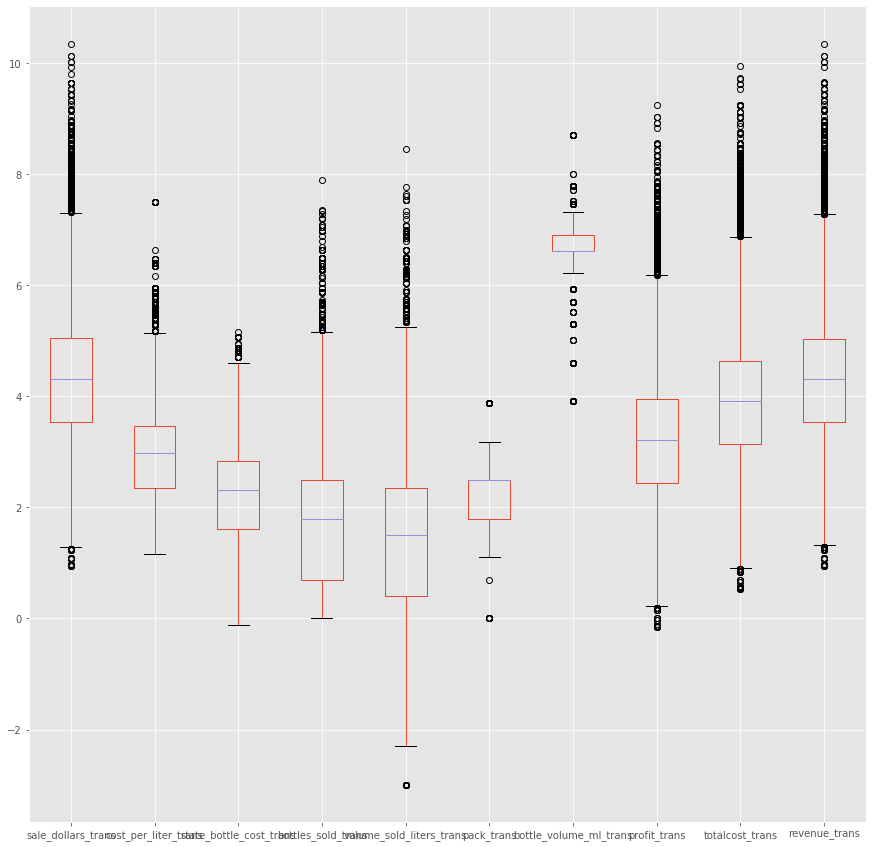

In [126]:
# Since we transformed a number of continuous variables, we can drop them so that we are working directly on our normalized data


# Remove unwanted columns, which include all the specific liquor categories, 
# except for liquor_category_WHISKY since that is what we want to classify on, along
# with all the store_ attributes
"""
cat_vars=['counter', 'liquor_category', 'store_parent',
 'month', 'year', 'monthyear', 'liquor_category_AMARETTO', 'liquor_category_BRANDY', 'liquor_category_GIN', 
 'liquor_category_LIQUEUR', 'liquor_category_Other', 'liquor_category_RUM', 'liquor_category_SCHNAPPS', 
 'liquor_category_TEQUILA', 'liquor_category_VODKA', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb',
 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 
 'store_parent_CVS', 'store_parent_Caseys', 'store_parent_Hy-Vee', 'store_parent_Kum&Go', 
 'store_parent_Other', 'store_parent_QuikTrip', 'store_parent_SamsClub', 'store_parent_SmokingJoes', 
 'store_parent_Target', 'store_parent_Wal-Mart', 'store_parent_Walgreens']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
"""
#keep our transformed detail, along with the timing and store name detail

to_keep=['sale_dollars_trans', 'cost_per_liter_trans', 'store_parent',
      'state_bottle_cost_trans', 'bottles_sold_trans',
       'volume_sold_liters_trans','pack_trans', 'bottle_volume_ml_trans', 
       'profit_trans', 'totalcost_trans', 'revenue_trans', 'id_label']
data_final=data[to_keep]
data_final.columns.values

#boxplot of all the variables
plt.figure(figsize=(15, 15))
ax = data_final.boxplot()
#ax.set_yscale('log')

print(data_final.shape)


From the standpoint of the boxplots, we can see that we have some uniformity in our continuous features with minimal outliers. To help us accurately predict our liquor categires, this will be helpful in us using these features build versious models to compare performance. Running a quick shape feature, we can see that we are not missing any data.

In the code above, you can see that we are removing many variables to our model that we don't think will factor into the final performance. These include nominal data such as store parent, counter and date. Additionally, we will be removing a ton of one-hot encoded data that will not play a role in our classifiers. 

In [127]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
sale_dollars_trans          40000 non-null float64
cost_per_liter_trans        40000 non-null float64
store_parent                40000 non-null object
state_bottle_cost_trans     40000 non-null float64
bottles_sold_trans          40000 non-null float64
volume_sold_liters_trans    40000 non-null float64
pack_trans                  40000 non-null float64
bottle_volume_ml_trans      40000 non-null float64
profit_trans                40000 non-null float64
totalcost_trans             40000 non-null float64
revenue_trans               40000 non-null float64
id_label                    40000 non-null object
dtypes: float64(10), object(2)
memory usage: 3.7+ MB


Running a quick df describe, we can se that almost all of our variables are floats to account for the transformations. With the id_label and store parent being an object features used as our classifiers we are looking to use in our datasets. The last feature pack is represented as an int, which makes sense because they are typically sold in packs of 6, 12, 24 and 48.

## Data Preparation Part 2

Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

In [128]:
data_final.describe()

,sale_dollars_trans,cost_per_liter_trans,state_bottle_cost_trans,bottles_sold_trans,volume_sold_liters_trans,pack_trans,bottle_volume_ml_trans,profit_trans,totalcost_trans,revenue_trans
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,4.298454,2.971822,2.235238,1.657888,1.326632,2.334344,6.576622,3.200717,3.893126,4.298837
std,1.127726,0.865337,0.782898,1.106078,1.384640,0.525811,0.762413,1.127691,1.127849,1.127796
min,0.943906,1.163151,-0.116534,0.000000,-2.995732,0.000000,3.912023,-0.150823,0.536493,0.943906
25%,3.544432,2.345645,1.607436,0.693147,0.405465,1.791759,6.620073,2.446685,3.138966,3.544432
50%,4.319087,2.987700,2.306577,1.791759,1.504077,2.484907,6.620073,3.222071,3.912823,4.319087
75%,5.050625,3.465319,2.839078,2.484907,2.351375,2.484907,6.907755,3.943522,4.634341,5.040582
max,10.352874,7.495542,5.164729,7.901007,8.460623,3.871201,8.699515,9.254262,9.947409,10.352874


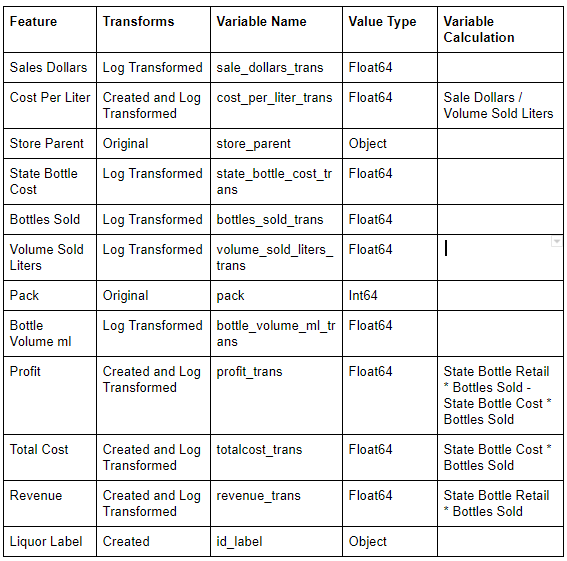


In [129]:
data_final.shape

(40000, 12)

Our final data set includes 12 features and 400,000 entries. 

In [130]:
(data_final['store_parent'].value_counts()/len(data_final))*100

Other          46.6750
Hy-Vee         39.0950
Wal-Mart        4.3475
Caseys          2.3775
SamsClub        1.9700
SmokingJoes     1.5275
Kum&Go          1.2725
QuikTrip        1.2575
Target          0.8375
Walgreens       0.4175
CVS             0.2225
Name: store_parent, dtype: float64

## Modeling and Evaluation 1

Within this notebook, we have built multiple models to evaluate two classification problems.  The first, is a multi-classification problem in which our goal is to correctly classify the alcohol category based on sales data.  The second, is a binary classification to determine whether the alcohol sold is from a Hy-vee store vs a Non-Hy-vee store.  A detailed description of the metrics we will use to evaluate the models are noted below.

An ROC curve, also known as a Reciever Operation Characteristic Curve is a plot that calculates and can be used to compare the classifiers we will use in our modeling along with the true positive rate (TPR) and false positive rate (FPR) they convey. From a topline level, you can use the Area Under the Curve (AUC) to help detirmine which can better pair an observation with the correct liquor cateogry. An AUC score of 1.0 denotes a perfect classifier and an area of 0.5 represents a model is no better than a random guess.

In addition to the ROC-AUC value we will use to evaluate classifiers, we will be using other evaluators as well. 

**Accuracy** - Accuracy is the total number of correct predictions over the total number of predictions made. Accuracy will be plotted in our AUC curve and, while not perfect, is a good singlular measure to evaluate a model. Just be careful that we aren't overclassifying unbalalnced variables. 

Accuracy = (TP + TN)/(TP + FP + FN + TN)

**Precision** - Precision is the Proportions of true positives over the total number of positive outcomes whether accurately predicted or inaccurately predicted. Precision is useful to us because it will help us better understand which model is accurately picking correct classes and not resting on selecting incorrect classes. 

Precision = (TP) / (TP + FP)

**Recall** - Also known as sensitivity, recall is the proportion of positive outcomes that were correctly classified by our model. Essentially it tells us how many values we incorrectly predicted while the precision can tell us more about what we correctly classified. Recall is good as a pair with precision, as it will help us tell if our model is overfit or selecting a single class and not training itself. 

Recall/Sensitivity = (TP) / (TP + FN)

The aim of our modeling is to focus on maximizing our precision, recall, and accuracy scores in our models



In [0]:
#Source: https://github.com/jakemdrew/EducationDataNC/blob/master/2017/Models/2017ComparingSegregatedMiddleSchoolCampuses.ipynb
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10)


def EvaluateClassifierEstimator(classifierEstimator, X, Y2, cv):



#Perform cross validation 
    scores = cross_validate(classifierEstimator, X, Y2,
                            scoring=['accuracy', 'precision','recall'], 
                            cv=cv, return_train_score=True, 
                            )

    Accavg = scores['test_accuracy'].mean()
    Preavg = scores['test_precision'].mean()
    Rreavg = scores['test_recall'].mean()

    print_str = "The average accuracy for all cv folds is: \t\t\t {Accavg:.5}"
    print_str2 = "The average precision for all cv folds is: \t\t\t {Preavg:.5}"
    print_str3 = "The average Recall for all cv folds is: \t\t\t {Rreavg:.5}"

    print(print_str.format(Accavg=Accavg))
    print(print_str2.format(Preavg=Preavg))
    print(print_str3.format(Rreavg=Rreavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['Accuracy'] = scores['test_accuracy']
    scoresResults['Precision'] = scores['test_precision']
    scoresResults['Recall'] = scores['test_recall']
    print(scoresResults)
    return scoresResults

def EvaluateClassifierEstimator2(classifierEstimator, X, Y2, cv):
    
  #Perform cross validation 
  from sklearn.model_selection import cross_val_predict
  predictions = cross_val_predict(classifierEstimator, 
                                  X, Y2, cv=cv)
    
#model evaluation 
  from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#pass true test set values and predictions to classification_report
  classReport = classification_report(Y2,predictions)
  confMat = confusion_matrix(Y2,predictions)
  acc = accuracy_score(Y2,predictions)
    
  print(classReport)
  print(confMat)
  print(acc)
    
def EvaluateClassifierEstimator3(classifierEstimator, X, Y2, cv):
  from sklearn import metrics as mt
  for fold, (train_index, test_index) in enumerate(cv.split(X,Y2)):
     X_train = X[train_index]    
     y_train = Y2[train_index]  # Based on your code, you might need a ravel call here, but I would look into how you're generating your y
     X_test = X[test_index]
     y_test = Y2[test_index]  # See comment on ravel and  y_train
     sm = SMOTE(random_state=101)
     X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train, y_train)
     classifierEstimator.fit(X_train, y_train) 
     y_pred = classifierEstimator.predict(X_test)
     acc = mt.accuracy_score(y_test,y_pred)
     conf = mt.confusion_matrix(y_test,y_pred)
     print("====Iteration",fold," ====")
     print("accuracy", acc )
     print("confusion matrix\n",conf)


## Modeling and Evaluation 2
Choose the method you will use for dividing your data into training and testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time.

For our first classification problem, we identified an unbalanced distribution of alcohol categories within our dataset.  For example, Vodka is 38% of sales while Rum and Whiskey is 24% and 10% respectively.  To address this concern, we used a synthetic minority oversampling technique (SMOTE).  The SMOTE technique accounts for the minority classes withn the data by creating new synthetic instances similar to these minorities.  In other words, once SMOTE is used on the data we should have a balanced distribution between the different alcohol categories. 

Futhermore, to split our test & training data, we used a stratified k-fold cross validation method.  The number of splits used was 10, and our ratio of train vs test size was 80% to 20%.

The analysis and work performed regarding the SMOTE and CV method for Classification 1 is noted below. 

NOTE:  Details regarding the training and test splits for the second classification problem can be found within the Classification 2 (Store Data) section.

So we can begin to set a baseline for our accuracy score, let's do a quick look at the value counts and it's percent distribution of our liquor categories, the ones we are looking to classify. 

In [132]:
#class percentage split
dfgrp = data.groupby(['id_label','liquor_category'])
data_final['id_label'].value_counts()
dfgrp['counter'].count() / len(data_final) *100

id_label  liquor_category
1         Other               5.9650
10        BRANDY              0.0075
2         GIN                 4.2900
3         WHISKY             22.6125
4         TEQUILA             7.1325
5         LIQUEUR            13.4000
6         VODKA              32.7700
7         RUM                13.7875
8         SCHNAPPS            0.0050
9         AMARETTO            0.0300
Name: counter, dtype: float64

In [133]:
data_final['id_label'].value_counts()
dfgrp['counter'].count()

id_label  liquor_category
1         Other               2386
10        BRANDY                 3
2         GIN                 1716
3         WHISKY              9045
4         TEQUILA             2853
5         LIQUEUR             5360
6         VODKA              13108
7         RUM                 5515
8         SCHNAPPS               2
9         AMARETTO              12
Name: counter, dtype: int64

In [134]:
data_final = data_final[data_final['id_label'] < "8"]
data_final = data_final[data_final['id_label'] != "10"]
data_final['id_label'].value_counts()

6    13108
3     9045
7     5515
5     5360
4     2853
1     2386
2     1716
Name: id_label, dtype: int64

So that our model is able to run correctly without having to create a large amount of additional variables, we decided to drop the Amaretto, Schnapps and Brandy values since collectively, those represent 17 observations. 

In [135]:
data_final.shape

(39983, 12)

Looking at the distribution of liquors in our data_final dataset, we can see that vodka takes up 38% of the liquor sales in our set, followed by Run at 24%, Liquer at 12%, Whisky at 10% and so on. When we run our classifier, we will need to be careful to account for the unbalanced nature of our classifiers to help ensure we aren't overclassifying the majority labels. 

For our data training, we will need to employ synthetic minority oversampling technique (SMOTE), which is designed to subset our data from the minority classes as an example with new synthetic instances similar to these minorities are created and added to a new data set which we will use as a train to our classification models. 

But first, we will assign our X and Y variables and a stratified Kfold to evaluate our meotrics. The reason we want to do a stratified k-fold is because it will test our model multiple times using different splits of the data and different testing groups. The average at the end will help us get an accurate score of how strong our model is and accounts for any skewness in the data that was not captured in the transform. 

We think this is most appropriate since we've transformed our data, so we should get minimal outlier skew, and we will have an aggredate score of accuracy, precision and recall based on different groupings of the data.

In [136]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics as mt

cv = StratifiedKFold(n_splits=10)

features = ['sale_dollars_trans', 'cost_per_liter_trans', 
       'state_bottle_cost_trans', 'bottles_sold_trans',
       'volume_sold_liters_trans', 'pack_trans', 'bottle_volume_ml_trans',
       'profit_trans', 'totalcost_trans', 'revenue_trans']

X2 = data_final[features].copy()

scaler = StandardScaler()
scaler.fit(X2)

#This makes our model's coefficients take on the same scale for accurate feature importance analysis
#Notice we scaled the data before the cross validation
X = scaler.transform(X2)

Y= data_final[['id_label']].copy()
Y2 = Y.values

#Divide data into test and training splits
from sklearn.model_selection import ShuffleSplit
#cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)

CPU times: user 15.9 ms, sys: 1.02 ms, total: 16.9 ms
Wall time: 16.9 ms


#### Evaluation Model: SMOTE

Now that we built our cross validation and assigned Xs and Ys, we will now work to create our training set and test set using SMOTE to balance our classifiers. Training size was 80% of our data and the test size was 20%. 

In [0]:
from sklearn import metrics as mt

# train and test split before resampling
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2, random_state = 101) 


In [138]:

print("Before OverSampling, counts of label 'Other': {}".format(sum(y1_train['id_label'] == "1")))
print("Before OverSampling, counts of label 'GIN': {} \n".format(sum(y1_train['id_label'] == "2"))) 
print("Before OverSampling, counts of label 'WHISKY': {} \n".format(sum(y1_train['id_label'] == "3"))) 
print("Before OverSampling, counts of label 'TEQUILA': {}".format(sum(y1_train['id_label'] == "4")))
print("Before OverSampling, counts of label 'LIQUEUR': {} \n".format(sum(y1_train['id_label'] == "5"))) 
print("Before OverSampling, counts of label 'VODKA': {} \n".format(sum(y1_train['id_label'] == "6"))) 
print("Before OverSampling, counts of label 'RUM': {} \n".format(sum(y1_train['id_label'] == "7"))) 


# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X1_train_res, y1_train_res = sm.fit_sample(X1_train, y1_train.values.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X1_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y1_train_res.shape)) 
  
print("After OverSampling, counts of label 'Other': {}".format(sum(y1_train_res == "1"))) 
print("After OverSampling, counts of label 'GIN': {}".format(sum(y1_train_res == "2"))) 
print("After OverSampling, counts of label 'WHISKY': {}".format(sum(y1_train_res == "3"))) 
print("After OverSampling, counts of label 'TEQUILA': {}".format(sum(y1_train_res == "4"))) 
print("After OverSampling, counts of label 'LIQUEUR': {}".format(sum(y1_train_res == "5"))) 
print("After OverSampling, counts of label 'VODKA': {}".format(sum(y1_train_res == "6"))) 
print("After OverSampling, counts of label 'RUM': {}".format(sum(y1_train_res == "7"))) 
 


Before OverSampling, counts of label 'Other': 1902
Before OverSampling, counts of label 'GIN': 1374 

Before OverSampling, counts of label 'WHISKY': 7242 

Before OverSampling, counts of label 'TEQUILA': 2289
Before OverSampling, counts of label 'LIQUEUR': 4275 

Before OverSampling, counts of label 'VODKA': 10504 

Before OverSampling, counts of label 'RUM': 4400 

After OverSampling, the shape of train_X: (73528, 10)
After OverSampling, the shape of train_y: (73528,) 

After OverSampling, counts of label 'Other': 10504
After OverSampling, counts of label 'GIN': 10504
After OverSampling, counts of label 'WHISKY': 10504
After OverSampling, counts of label 'TEQUILA': 10504
After OverSampling, counts of label 'LIQUEUR': 10504
After OverSampling, counts of label 'VODKA': 10504
After OverSampling, counts of label 'RUM': 10504


## Classification Task 1 (Liquor Type)





### Task 1 - Modeling and Evaluation 3
Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!  

As previously mentioned within a section above, our goal of this classification problem is to correctly classify the alcohol category based on sales data.  We tried 3 different algorithms within our models and compared them using our evaluation metrics.  The algorithms used are as follows:  

*   K-Nearest Neighbor
*   Random Forest Classification
*   Logistic Regression

A ROC/AUC plot will be created for each model and summarized our findings based on the combined results for these different models.

#### Model 1: KNN Classification

Details regarding this model are noted in the code below, but to quickly summarize, this model has an average accuracy score of 0.58 and a Precision, Recall, & F1 Score of 0.91, 0.91, & 0.91 respectively.  After evaluation this is not our best fitting model.

Initially, it looks like this but after our cross validation, but details on our model are outlined below in the code. 

In [139]:

param_grid = [
    {
         'weights': ['uniform','distance'],
         'leaf_size': [5,10],
         'metric': ['minkowski','euclidean'],
         'n_neighbors':[2,3,5],
         
    }
]

clf_KNN = KNeighborsClassifier()
grid_search_KNN = GridSearchCV(clf_KNN, param_grid=param_grid,cv=cv,n_jobs=-1, verbose=1, scoring='accuracy' )

KNearest_model1 = grid_search_KNN.fit(X1_train_res, y1_train_res)

y_KNN_score1 = grid_search_KNN.predict(X1_test)



Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.7min finished


Our first modeling procedure we ran was a KNN classification. Detail on the concept behind it can be found below, but on this particular version, we are using our smote engineered features to fit the model and running a grid search procedure to select the best hyperparameter. 

In [142]:
classifierEstimaterKNN1 = KNearest_model1.best_estimator_
classifierEstimaterKNN1


KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

According to our grid search, the best estimator is to include 5 neighbors, a leaf size of 10 and a minkowski metric to learn from. 

In [0]:
#import pickle
#filename = r'C:/Users/jjsch/Documents/GitHub/7331lab1/7331DataMiningNotebooks/lab2/classifierEstimaterKNN1.pickle'
#infile = open(filename,'rb')
#classifierEstimaterKNN1 = pickle.loads(infile)
#infile.close()
#outfile = open(filename,'wb')
#pickle.dumps(classifierEstimaterKNN1, filename)
#from joblib import dump, load
#dump(classifierEstimaterKNN1, filename)

In [144]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print("Precision Score is: {}" .format(precision_score(y1_test, y_KNN_score1, average='weighted')))
print("Recall Score is: {}" .format(recall_score(y1_test, y_KNN_score1, average='weighted')))
print("F1 Score is: {}" .format(f1_score(y1_test, y_KNN_score1, average='weighted')))

Precision Score is: 0.917227717693073
Recall Score is: 0.9139677379017132
F1 Score is: 0.9149401290492261


After Running our procedure, we were able get garner a very strong precision, recall and F1 score. which was very high. These scores are strong supporters in accuracy in that it helps test whether a model is truly trying to predict a value rather than selecting a single value. 

In [145]:
classifierEstimaterKNN1.fit(X1_train_res,y1_train_res)



KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [146]:
EvaluateClassifierEstimator3(classifierEstimaterKNN1, X, Y2, cv)

====Iteration 0  ====
accuracy 0.6026506626656665
confusion matrix
 [[ 135    3    8    2   34   33   24]
 [   7  139    5    0    6   15    0]
 [  63   87  566    4   28  143   13]
 [  18    1   68   90   31   24   53]
 [  39   47   49   14  123  248   16]
 [  39    6   26    4   28 1176   32]
 [  50   23  187   22   55   34  181]]
====Iteration 1  ====
accuracy 0.7996999249812453
confusion matrix
 [[  99   13   68    4   18   30    7]
 [   1  115   14    1   26   15    0]
 [  28   24  819    2    9   11   11]
 [   0    0    1  268    1    7    8]
 [   0    0    3   11  375   97   50]
 [   8    0    1   10   23 1248   21]
 [  20    8   38   20  140   52  274]]
====Iteration 2  ====
accuracy 0.6611652913228308
confusion matrix
 [[ 114    3   46   14   11   40   11]
 [   3   72   29    0   56   11    0]
 [ 102   11  753    2    0    4   33]
 [   0    1    0  274    5    5    0]
 [  35   33   10   71   55  261   71]
 [  29    2   13    2   89 1058  118]
 [  12    0    8   84   11  119  3

Here's where we ran the 10 folds of our classifier to evaluate the accuracy. As you can see through our iterations, we were getting accuracy scores from 0.37 through to 0.79. 

In [147]:
from sklearn.model_selection import cross_val_score

KNN_accuracy = cross_val_score(classifierEstimaterKNN1, X, y=Y2, cv=cv)
KNN_acc=KNN_accuracy.mean()
print('Average KNN accuracy score is : {}' .format(KNN_acc))

Average KNN accuracy score is : 0.5823395818939727


Compiling all of our accuracies together, we can say we found an average accuracy score of 0.58, which we will use to compare against future models on the liquor classifier.

In [0]:
##not sure about this one?
#from sklearn.metrics import fbeta_score, make_scorer
#nested_score = cross_val_score(classifierEstimaterKNN1, X=X, y=Y2, cv=cv, \
#               scoring=make_scorer(classification_report_with_accuracy_score))
#print(nested_score)

To give a visual representation of our model performance, let's plot out the true positive rates and false negative rates for each class. But first, we are going to see how accurate we were with predicting each class.

In [0]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

yhat= np.zeros(Y2.shape)

def per_class_accuracy(ytrue,yhat):
    conf = mt.confusion_matrix(ytrue,yhat)
    norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
    return np.diag(norm_conf)

def plot_class_acc(ytrue,yhat, title=''):
    acc_list = per_class_accuracy(ytrue,yhat)
    plt.bar(range(len(acc_list)), acc_list)
    plt.xlabel('Class value (one per category)')
    plt.ylabel('Accuracy within class')
    plt.title(title+", Total Acc=%.1f"%(100*mt.accuracy_score(ytrue,yhat)))
    plt.grid()
    plt.ylim([0,1])
    plt.show()
#yhat = classifierEstimaterKNN1.predict(X1_test)       
#plot_class_acc(y1_test,yhat,title="KNN")


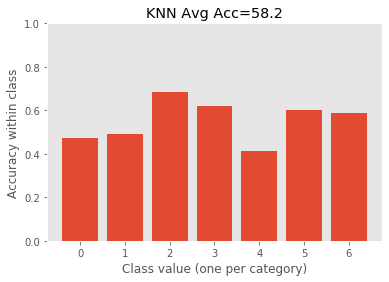

In [150]:
totalacc = 0
totalprec = 0
totalrec= 0
totalf1  = 0
list = []
perclasslist = []
for fold, (train_index, test_index) in enumerate(cv.split(X,Y2)):
     X_train = X[train_index]    
     y_train = Y2[train_index]  # Based on your code, you might need a ravel call here, but I would look into how you're generating your y
     X_test = X[test_index]
     y_test = Y2[test_index]  # See comment on ravel and  y_train
     sm = SMOTE(random_state=101)
     X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train, y_train)
     classifierEstimaterKNN1.fit(X_train, y_train) 
     y_pred = classifierEstimaterKNN1.predict(X_test)
     acc = mt.accuracy_score(y_test,y_pred)
     prec = precision_score(y_test, y_pred, average='weighted')
     rec = recall_score(y_test, y_pred, average='weighted')
     f1 = f1_score(y_test, y_pred, average='weighted')
     perclassaccuracy = per_class_accuracy(y_test,y_pred)
     perclasslist.append(perclassaccuracy.tolist())
     totalacc += acc
     totalprec += prec
     totalrec += rec
     totalf1 += f1
     conf = mt.confusion_matrix(y_test,y_pred)
#     print("Sum: ", totalacc, "Current: ", acc,"Per Class",perclassaccuracy,"\n")


avgaccuracy = 100*totalacc / cv.n_splits
avgprec = 100*totalprec / cv.n_splits
avgrec = 100*totalrec / cv.n_splits
avgf1 = 100*totalf1 / cv.n_splits
 
list = [("Model 1", "KNN", avgaccuracy, avgprec, avgrec, avgf1)]

perclassdf = []
perclassdf = pd.DataFrame(perclasslist)
#perclassdf = perclassdf.transpose()
#perclassdf

perclassavg = perclassdf.mean(axis = 0) 
#perclassavg

plt.bar(range(len(perclassavg)), perclassavg)
plt.xlabel('Class value (one per category)')
plt.ylabel('Accuracy within class')
#plt.title(title+", Total Acc=%.1f"%(totalaccuracy))
plt.title("KNN Avg Acc=%.1f"%(avgaccuracy))
plt.grid()
plt.ylim([0,1])
plt.show()

Looking at the graph above, we can detirmine that class 2, 3 and 5 were the most accurate classes we were predicting. Looking up at the reference key above, these would represent the Gin, Whiskey and Liquer classes respectively. 

In [0]:
ylist = Y['id_label'].values.astype('int64')
ylist
ylist.shape
from sklearn.preprocessing import label_binarize
ybinary = label_binarize(ylist, classes=[1, 2, 3, 4, 5, 6, 7])
n_classes = ybinary.shape[1]

X_train3, X_test3, y_train3, y_test3 = train_test_split(X,ybinary, test_size=0.2)

In [152]:
%%time
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_predict
# Learn to predict each class against the other
classifier = OneVsRestClassifier(KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance'))
knnbinarymodel = classifier.fit(X_train3, y_train3)
knnbinaryscore = knnbinarymodel.predict(X_test3)
y_score = cross_val_predict(classifier, X, ybinary, cv=10 ,method='predict_proba')

CPU times: user 15.9 s, sys: 16.2 ms, total: 15.9 s
Wall time: 15.9 s


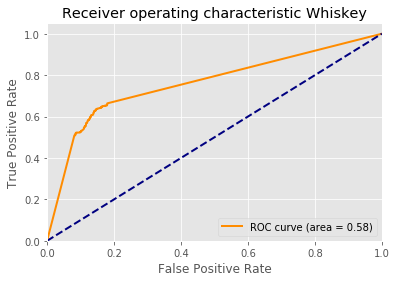

In [153]:
#X1_train, X1_test, y1_train, y1_test
#y_score = classifier.fit(X_train3, y_train3).decision_function(X_test3)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ybinary[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ybinary.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
#Plot of a ROC curve for a specific class

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[3])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Whiskey')
plt.legend(loc="lower right")
plt.show()

Now that we plotted our KNN classifier, we can see that the model leans more into true positives than false positives. This shows that are test tends to be more accurate than not. 

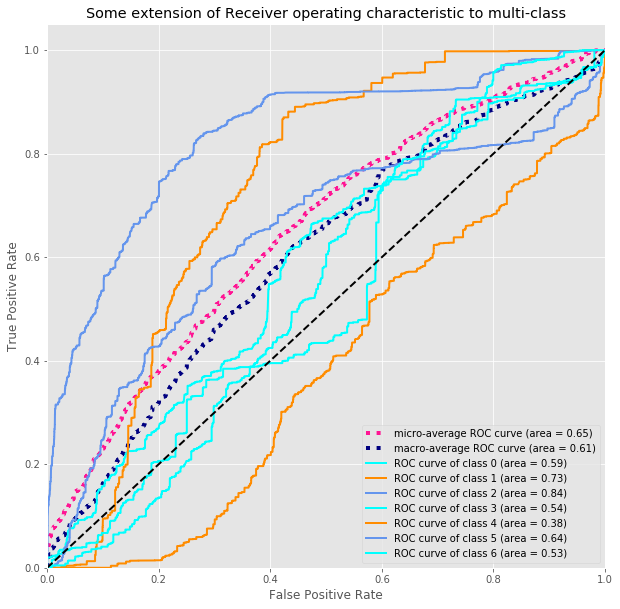

<Figure size 1080x1080 with 0 Axes>

In [267]:
roc_list = []
from scipy import interp
from itertools import cycle
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
roc_list = [("Model 1", "KNN", roc_auc["macro"], fpr["macro"],tpr["macro"])]
# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.rcParams["figure.figsize"] = (10,10)
plt.figure(figsize=(15, 15)) 
plt.show()

Here is a plot of all of our classes in the model. We can see here that the class 5, was the most accurate classifier. That said, note that each curve follows the same guide as the overall model, of being more accurate than not. 

#### Model 2: Random Forest Classification

Details regarding this model are noted in the code below, but to quickly summarize, this model has an average accuracy score of 0.67 and a Precision, Recall, & F1 Score of 0.93, 0.93, & 0.93 respectively.  After cross evaluation there was more factors to be detirmined from the output of our code below. 

In [155]:
param_grid = [
    {
         'n_estimators': [200, 500], 
         'max_depth': [20,30,35],
         'random_state':[101]
     }
]

clf_RF = RandomForestClassifier()
grid_search_RF = GridSearchCV(clf_RF, param_grid=param_grid, cv=cv,n_jobs=-1, verbose=1, scoring='accuracy' )

RandomForest_model1 = grid_search_RF.fit(X1_train_res, y1_train_res)

y_RF_score1 = grid_search_RF.predict(X1_test)


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 21.6min finished


In model 2, we ran a Random Forest Classification procedure to classify liquor types. You can learn more in the documentation below. 

https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/

Like the KNN model before, we decided to run a grid search procedure as well to help us find the optimal hyperparameters to tune to. 

In [156]:
classifierEstimaterRF1 = RandomForest_model1.best_estimator_
classifierEstimaterRF1

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

After running our Random Forest procedure, we can see the grid search selected, a max depth of 20, a number of estimators split of 500 and no warm start with our model. 

In [157]:

print("Precision Score is: {}" .format(precision_score(y1_test, y_RF_score1, average='weighted')))
print("Recall Score is: {}" .format(recall_score(y1_test, y_RF_score1, average='weighted')))
print("F1 Score is: {}" .format(f1_score(y1_test, y_RF_score1, average='weighted')))


Precision Score is: 0.9299054308005282
Recall Score is: 0.9280980367637864
F1 Score is: 0.92862062463523


Like with the KNN we saw previously, we can see that our precision, recall and F1 scores are very high, which suggest we have a strong model.

In [158]:
%%time
EvaluateClassifierEstimator3(classifierEstimaterRF1, X, Y2, cv)


====Iteration 0  ====
accuracy 0.6731682920730182
confusion matrix
 [[ 140    1   12    3   29   35   19]
 [   3  120    1    0    4   44    0]
 [  35   56  682    1   15  114    1]
 [  28    1   71   87   34    8   56]
 [  56   38   24    0  271  123   24]
 [  33    5    8    6   10 1227   22]
 [  50   28  192   11   64   42  165]]
====Iteration 1  ====
accuracy 0.8312078019504876
confusion matrix
 [[ 124    5   73    1    8   24    4]
 [   1  136   18    1    8    8    0]
 [  19   22  843    1    5    5    9]
 [   0    0    0  280    0    5    0]
 [   0    0    2   11  378   94   51]
 [   2    0    0    0   18 1279   12]
 [  37    8   42   28  132   21  284]]
====Iteration 2  ====
accuracy 0.8107026756689172
confusion matrix
 [[ 129    1   60   13   11   21    4]
 [   2   77   26    0   54   10    2]
 [  48    2  819    0    1    3   32]
 [   0    0    0  282    0    3    0]
 [  35   18    5    1  362  102   13]
 [  22    2    0    0   27 1252    8]
 [  90    0    7   97   10   27  3

Running through each iteration of our kfold, we can see that our accuracy score ranges from 0.46 to 0.83. 

In [159]:
from sklearn.model_selection import cross_val_score

RF_accuracy = cross_val_score(classifierEstimaterRF1, X, y=Y2, cv=cv)
RF_acc=RF_accuracy.mean()
print('Average RF accuracy score is : {}' .format(RF_acc))

Average RF accuracy score is : 0.6716029244930041


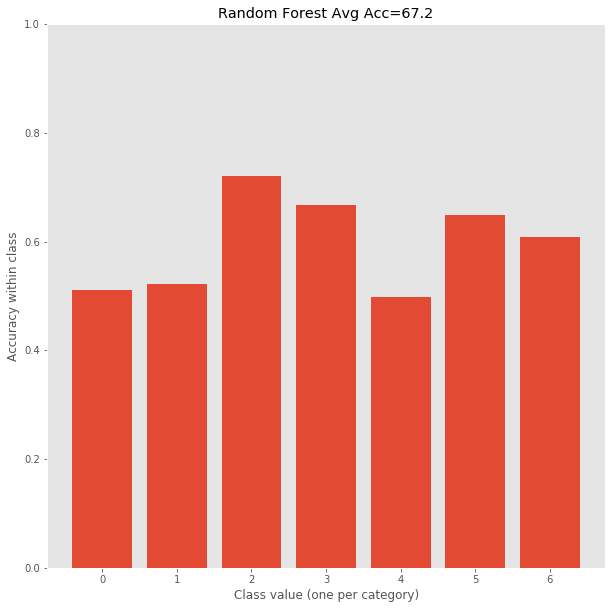

In [160]:
totalacc = 0
totalprec = 0
totalrec= 0
totalf1  = 0

for fold, (train_index, test_index) in enumerate(cv.split(X,Y2)):
     X_train = X[train_index]    
     y_train = Y2[train_index]  # Based on your code, you might need a ravel call here, but I would look into how you're generating your y
     X_test = X[test_index]
     y_test = Y2[test_index]  # See comment on ravel and  y_train
     sm = SMOTE(random_state=101)
     X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train, y_train)
     classifierEstimaterRF1.fit(X_train, y_train) 
     y_pred = classifierEstimaterRF1.predict(X_test)
     acc = mt.accuracy_score(y_test,y_pred)
     prec = precision_score(y_test, y_pred, average='weighted')
     rec = recall_score(y_test, y_pred, average='weighted')
     f1 = f1_score(y_test, y_pred, average='weighted')
     perclassaccuracy = per_class_accuracy(y_test,y_pred)
     perclasslist.append(perclassaccuracy.tolist())
     totalacc += acc
     totalprec += prec
     totalrec += rec
     totalf1 += f1
     conf = mt.confusion_matrix(y_test,y_pred)
#     print("Sum: ", totalacc, "Current: ", acc,"Per Class",perclassaccuracy,"\n")


avgaccuracy = 100*totalacc / cv.n_splits
avgprec = 100*totalprec / cv.n_splits
avgrec = 100*totalrec / cv.n_splits
avgf1 = 100*totalf1 / cv.n_splits
 

list.append(("Model 2", "Random Forest", avgaccuracy, avgprec, avgrec, avgf1))

perclassdf = []
perclassdf = pd.DataFrame(perclasslist)
#perclassdf = perclassdf.transpose()
#perclassdf

perclassavg = perclassdf.mean(axis = 0) 
#perclassavg

plt.bar(range(len(perclassavg)), perclassavg)
plt.xlabel('Class value (one per category)')
plt.ylabel('Accuracy within class')
#plt.title(title+", Total Acc=%.1f"%(totalaccuracy))
plt.title("Random Forest Avg Acc=%.1f"%(avgaccuracy))
plt.grid()
plt.ylim([0,1])
plt.show()

Like our previous models, we can see class 2, 3 and 5 were the most accurately predicted classes in our model. 

In [161]:
ylist = Y['id_label'].values.astype('int64')
ylist
ylist.shape

(39983,)

In [162]:
list

[('Model 1',
  'KNN',
  58.23395818939728,
  58.34350559044941,
  58.23395818939728,
  56.50715998546683),
 ('Model 2',
  'Random Forest',
  67.1602924493004,
  68.6592368482461,
  67.1602924493004,
  66.05111493740495)]

In [0]:
from sklearn.preprocessing import label_binarize
ybinary = label_binarize(ylist, classes=[1, 2, 3, 4, 5, 6, 7])
n_classes = ybinary.shape[1]

X_train4, X_test4, y_train4, y_test4 = train_test_split(X,ybinary, test_size=0.2) # 70% training and 30% test

In [164]:
%%time
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_predict
# Learn to predict each class against the other
rfclassifiercv = OneVsRestClassifier(RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False))
rfbinarymodel = rfclassifiercv.fit(X_train4, y_train4)
rfbinaryscore = rfclassifiercv.predict(X_test4)
y_score = cross_val_predict(rfclassifiercv, X, ybinary, cv=10 ,method='predict_proba')

CPU times: user 20min 49s, sys: 6.3 s, total: 20min 55s
Wall time: 20min 58s


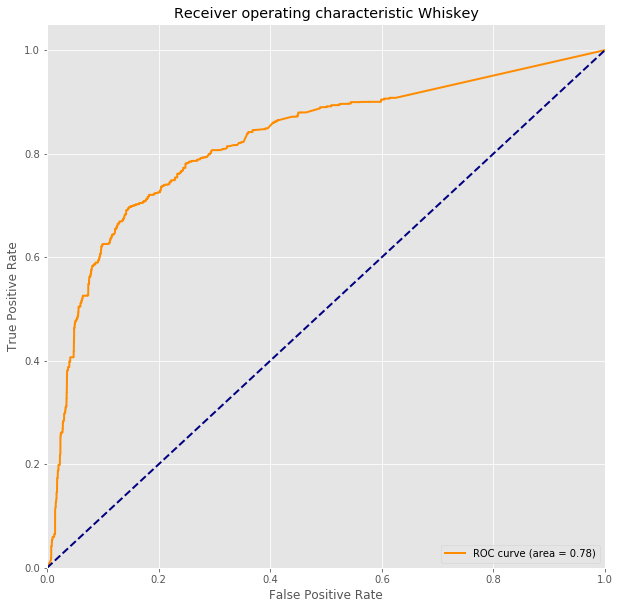

In [165]:
#X1_train, X1_test, y1_train, y1_test
#y_score = classifier.fit(X_train3, y_train3).decision_function(X_test3)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ybinary[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ybinary.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
#Plot of a ROC curve for a specific class

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[3])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Whiskey')
plt.legend(loc="lower right")
plt.show()

Looking at the average value ROC curve, we can see this model was the strongest performer as indicated by the area under the curve. 

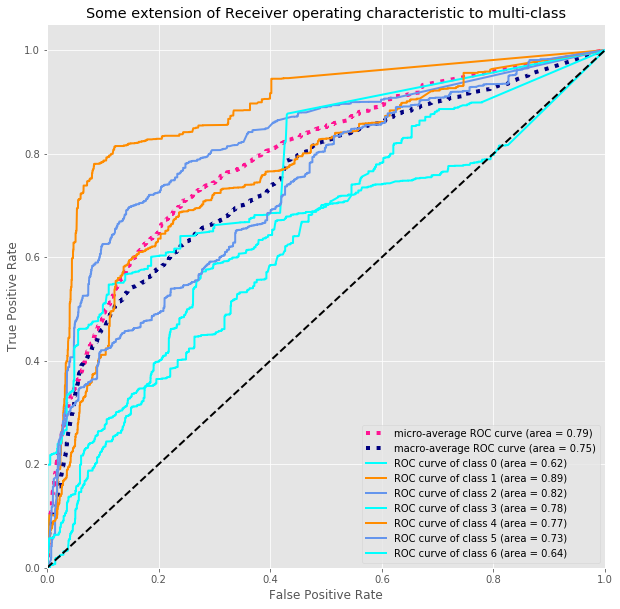

In [166]:
from scipy import interp
from itertools import cycle
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
roc_list.append(("Model 2", "RF", roc_auc["macro"],fpr["macro"],tpr["macro"]))
# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

With an ROC curve of the classes, we can see the random forest was pretty accurate in predicting each of the classes, with a positive outcome on each curve. 

#### Model 3: Logistic Regression

Details regarding this model are noted in the code below, but to quickly summarize, this model has an average accuracy score of 0.27 and a Precision, Recall, & F1 Score of 0.46, 0.32, & 0.34 respectively. After evaluation this is not our best fitting model.

In [167]:
from sklearn.linear_model import LogisticRegression

parameters = { 'penalty':['l2']
              ,'C': [0.1, 1, 10, 100]
              ,'class_weight': ['balanced','none']
              ,'solver': ['lbfgs']
              ,'max_iter':[1500,2000]
              ,'random_state':[101]
             }

clf_LR = LogisticRegression()
grid_search_LR = GridSearchCV(clf_LR, param_grid=parameters, cv=cv,n_jobs=-1, verbose=1, scoring='accuracy' )

LogisticRegression_model = grid_search_LR.fit(X1_train_res, y1_train_res)

y_LR_score = grid_search_LR.predict(X1_test)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 23.9min finished


In [168]:
classifierEstimaterLR = LogisticRegression_model.best_estimator_
classifierEstimaterLR

LogisticRegression(C=100, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=2000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=101, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [169]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision Score is: {}" .format(precision_score(y1_test, y_LR_score, average='weighted')))
print("Recall Score is: {}" .format(recall_score(y1_test, y_LR_score, average='weighted')))
print("F1 Score is: {}" .format(f1_score(y1_test, y_LR_score, average='weighted')))


Precision Score is: 0.46045007322887543
Recall Score is: 0.32537201450543957
F1 Score is: 0.3404978440998716


Precision, Recall and F1 score were very inaccurate with scores less than 50% across the board. 

In [170]:
EvaluateClassifierEstimator3(classifierEstimaterLR, X, Y2, cv)


====Iteration 0  ====
accuracy 0.32733183295823953
confusion matrix
 [[108   1  27  28   6  62   7]
 [ 15 102  39   0  16   0   0]
 [214  54 578   4   7  45   2]
 [ 35   3  58  97  12  28  52]
 [ 61 176   3 126  53  44  73]
 [329  13   6 323  35 308 297]
 [140  55  88  96  94  16  63]]
====Iteration 1  ====
accuracy 0.3663415853963491
confusion matrix
 [[ 67  19  73  17   9  15  39]
 [  8 118  27   3  15   1   0]
 [ 87  94 716   3   3   0   1]
 [  0  12   0 115  64   1  93]
 [ 10 130   2 186  13 180  15]
 [270   8   0 472  25 318 218]
 [ 31  30  11 313  42   7 118]]
====Iteration 2  ====
accuracy 0.20930232558139536
confusion matrix
 [[  67   23   90   16    0   24   19]
 [   7  134   14    5    0    0   11]
 [ 458   15  429    0    1    0    2]
 [   0   79    0  118   36    0   52]
 [  53  148    7  109   10   80  129]
 [ 135   39    0 1004    7   37   89]
 [   0    7    0  495    6    2   42]]
====Iteration 3  ====
accuracy 0.17083541770885444
confusion matrix
 [[  81   19   61    1 

In [171]:
from sklearn.model_selection import cross_val_score
LR_accuracy = cross_val_score(classifierEstimaterLR, X, y=Y2, cv=cv)
LR_acc=LR_accuracy.mean()
print('Average LR accuracy score is : {}' .format(LR_acc))

Average LR accuracy score is : 0.2722635573850941


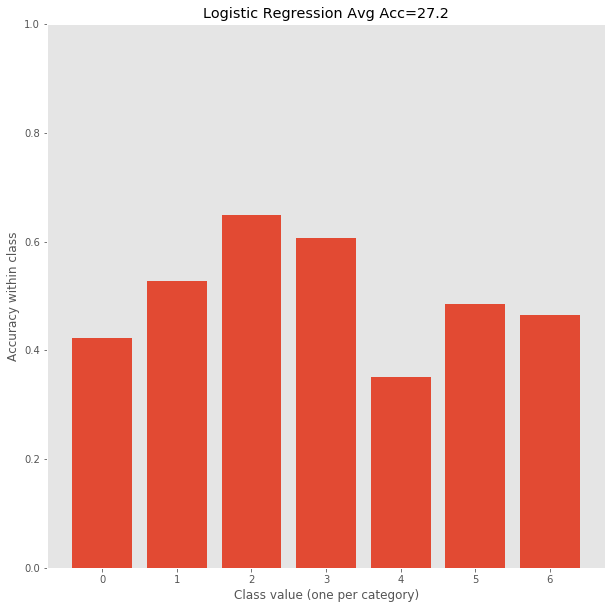

In [172]:
totalacc = 0
totalprec = 0
totalrec= 0
totalf1  = 0

for fold, (train_index, test_index) in enumerate(cv.split(X,Y2)):
     X_train = X[train_index]    
     y_train = Y2[train_index]  # Based on your code, you might need a ravel call here, but I would look into how you're generating your y
     X_test = X[test_index]
     y_test = Y2[test_index]  # See comment on ravel and  y_train
     sm = SMOTE(random_state=101)
     X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train, y_train)
     classifierEstimaterLR.fit(X_train, y_train) 
     y_pred = classifierEstimaterLR.predict(X_test)
     acc = mt.accuracy_score(y_test,y_pred)
     prec = precision_score(y_test, y_pred, average='weighted')
     rec = recall_score(y_test, y_pred, average='weighted')
     f1 = f1_score(y_test, y_pred, average='weighted')
     perclassaccuracy = per_class_accuracy(y_test,y_pred)
     perclasslist.append(perclassaccuracy.tolist())
     totalacc += acc
     totalprec += prec
     totalrec += rec
     totalf1 += f1
     conf = mt.confusion_matrix(y_test,y_pred)
#     print("Sum: ", totalacc, "Current: ", acc,"Per Class",perclassaccuracy,"\n")


avgaccuracy = 100*totalacc / cv.n_splits
avgprec = 100*totalprec / cv.n_splits
avgrec = 100*totalrec / cv.n_splits
avgf1 = 100*totalf1 / cv.n_splits
 

list.append(("Model 3", "Logistic Regression", avgaccuracy, avgprec, avgrec, avgf1))

perclassdf = []
perclassdf = pd.DataFrame(perclasslist)
#perclassdf = perclassdf.transpose()
#perclassdf

perclassavg = perclassdf.mean(axis = 0) 
#perclassavg

plt.bar(range(len(perclassavg)), perclassavg)
plt.xlabel('Class value (one per category)')
plt.ylabel('Accuracy within class')
#plt.title(title+", Total Acc=%.1f"%(totalaccuracy))
plt.title("Logistic Regression Avg Acc=%.1f"%(avgaccuracy))
plt.grid()
plt.ylim([0,1])
plt.show()

Like the previous models, the Gin and Whiskey were the most accurate classes in our performance model. 

In [0]:
from sklearn.preprocessing import label_binarize
ybinary = label_binarize(ylist, classes=[1, 2, 3, 4, 5, 6, 7])
n_classes = ybinary.shape[1]

X_train5, X_test5, y_train5, y_test5 = train_test_split(X,ybinary, test_size=0.2) # 70% training and 30% test

In [174]:
%%time
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_predict
# Learn to predict each class against the other
logclassifiercv = OneVsRestClassifier(classifierEstimaterLR)
logbinarymodel = logclassifiercv.fit(X_train5, y_train5)
logbinaryscore = logclassifiercv.predict(X_test5)
y_score = cross_val_predict(logclassifiercv, X, ybinary, cv=10 ,method='predict_proba')

CPU times: user 25.5 s, sys: 15.3 s, total: 40.8 s
Wall time: 20.5 s


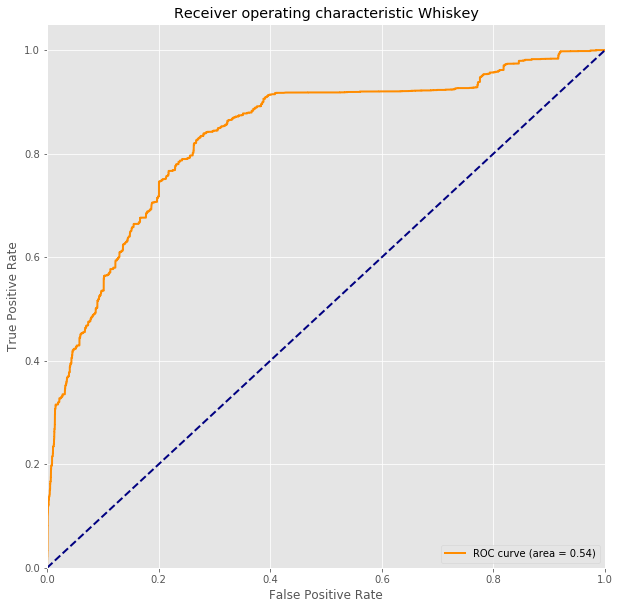

In [175]:
#X1_train, X1_test, y1_train, y1_test
#y_score = classifier.fit(X_train3, y_train3).decision_function(X_test3)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ybinary[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ybinary.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
#Plot of a ROC curve for a specific class

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[3])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Whiskey')
plt.legend(loc="lower right")
plt.show()

While this was not the top performing model, the logistic regression ROC curve generated positive results with the relaitonship of true positives and false positives 

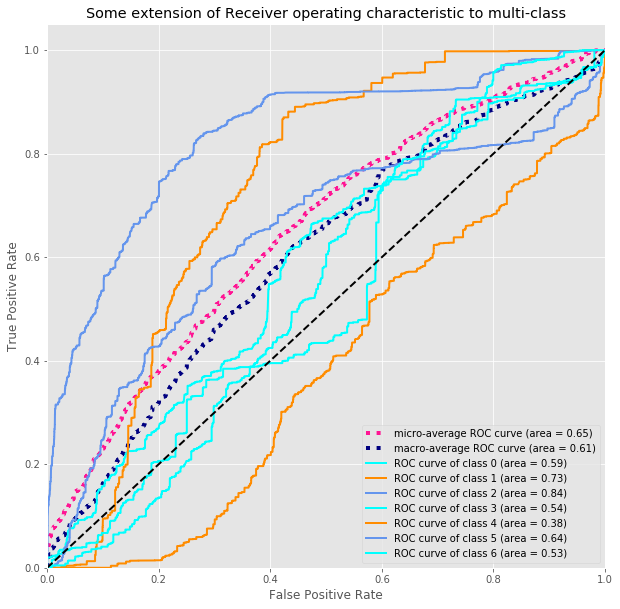

In [176]:
from scipy import interp
from itertools import cycle
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
roc_list.append(("Model 2", "LR", roc_auc["macro"],fpr["macro"],tpr["macro"]))
# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

Across each class, there was not a lot of consistency among our classes with the true positves being predicted by our logistical regression procedure.

#### Final Model chosen

### Task 1 - Modeling and Evaluation 4  
Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.

Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.

AUC for both KNN and Random Forest classifier is the same.The best model accuracy was Random Forest Classification at XXX%, the highest of 3 models evaluated.

We plotted the 3 ROC curves on a graph (see below). The shape of each ROC curve is not the same for all suggesting some models are better at producting classes of alcohol. Random Forest has the largest area under the curve suggesting it is the best of the 3.

The computation time taken by each model was comparable between each other. This leads to the conclusion that the Random Forest.




In [177]:
print ('accuracy for KNN classifier is :',KNN_acc)
print ('accuracy for Random Forest classifier is :',RF_acc)
print ('accuracy for Logistic Regression classifier is :',LR_acc)

accuracy for KNN classifier is : 0.5823395818939727
accuracy for Random Forest classifier is : 0.6716029244930041
accuracy for Logistic Regression classifier is : 0.2722635573850941


In [178]:
list
dfobj = pd.DataFrame(list, columns = ['Model Number', 'Model','Accuracy' , 'Precision', 'Recall', 'F1'], index=['0', '1', '2'])
dfobj

,Model Number,Model,Accuracy,Precision,Recall,F1
0,Model 1,KNN,58.233958,58.343506,58.233958,56.507160
1,Model 2,Random Forest,67.160292,68.659237,67.160292,66.051115
2,Model 3,Logistic Regression,27.226356,37.160409,27.226356,27.604865


In [179]:
dfroc = pd.DataFrame(roc_list, columns = ['Model Number', 'Model', 'ROC', "fpr", "tpr"], index=['0', '1', '2'])
dfroc

,Model Number,Model,ROC,fpr,tpr
0,Model 1,KNN,0.587234,"[0.0, 0.022273094532722866, 0.0223269593320764...","[0.0, 0.09158371380516994, 0.091736174092466, ..."
1,Model 2,RF,0.751273,"[0.0, 5.386479935362241e-05, 8.07971990304336e...","[5.987306909352174e-05, 0.02477672466686168, 0..."
2,Model 2,LR,0.606728,"[0.0, 2.6132176548984765e-05, 3.23227099360010...","[0.0013478748164938664, 0.0013478748164938664,..."


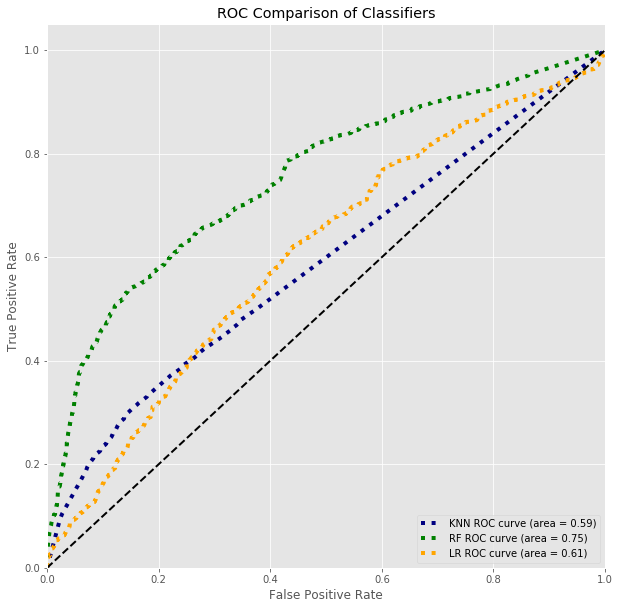

In [180]:
plt.plot(dfroc.iloc[0, 3], dfroc.iloc[0, 4],
         label='KNN ROC curve (area = {0:0.2f})'
               ''.format(dfroc.iloc[0, 2]),
         color='navy', linestyle=':', linewidth=4)

plt.plot(dfroc.iloc[1, 3], dfroc.iloc[1, 4],
         label='RF ROC curve (area = {0:0.2f})'
               ''.format(dfroc.iloc[1, 2]),
         color='green', linestyle=':', linewidth=4)

plt.plot(dfroc.iloc[2, 3], dfroc.iloc[2, 4],
         label='LR ROC curve (area = {0:0.2f})'
               ''.format(dfroc.iloc[2, 2]),
         color='orange', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Comparison of Classifiers')
plt.legend(loc="lower right")
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

### Task 1 - Modeling and Evaluation 5  
Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.




Advantages and overall assumptions for each of the three models we ran for task 1 are outlined below.  

For the KNN model, the main advantage was speed.  For example, the KNN model was able to finish running in under 3 minutes vs Random Forest and Logistic Regression which was greater than 20 minutes each.   Note, eventhough the model was quicker to run it did not provide us the best model statistics. 

For the Random Forest, the main advantage was predictability.  This could be due to the fact that Random Forest does well with highly dimensional data.  Furthermore, this is the best performing model with an accuaracy score at 0.67, and a Precision, Recall, & F1 Score of 0.93, 0.93, & 0.93 respectively. 

For the Logistic Regression model, the main advantage was that we were able to run the most number of different parameters as compared to other models.  Due to running 16 different parameter tests, the overall grid search + model was the slowest at 24.5 minutes.  In terms of predictability, this was the worst performing model. 



#### Statistical Comparisons of Classifiers

In [0]:
from sklearn.model_selection import cross_val_score
acc_KNN_t1 = cross_val_score(classifierEstimaterKNN1, X, y=Y, cv=cv)
acc_RF_t1 = cross_val_score(classifierEstimaterRF1, X, y=Y, cv=cv)
acc_LR_t1 = cross_val_score(classifierEstimaterLR, X, y=Y, cv=cv)

In [182]:
print ('accuracy for KNN classifier is :',acc_KNN_t1)
print ('accuracy for Random Forest classifier is :',acc_RF_t1)
print ('accuracy for Logistic Regression Classifier is :',acc_LR_t1)

accuracy for KNN classifier is : [0.60265066 0.79969992 0.66116529 0.43446723 0.67333667 0.59254627
 0.55827914 0.64057029 0.48149075 0.37918959]
accuracy for Random Forest classifier is : [0.67316829 0.8312078  0.81070268 0.47798899 0.74762381 0.71135568
 0.62931466 0.76213107 0.60455228 0.46798399]
accuracy for Logistic Regression Classifier is : [0.32733183 0.36634159 0.20930233 0.17083542 0.4132066  0.37343672
 0.21485743 0.20735368 0.1935968  0.24637319]


In [183]:
#Is t-value right here???
t = 2.26 / np.sqrt(10)

e_KNN_RF_t1 = (1-acc_KNN_t1)-(1-acc_RF_t1)
e_KNN_LR_t1 = (1-acc_KNN_t1)-(1-acc_LR_t1)
e_RF_LR_t1 = (1-acc_RF_t1)-(1-acc_LR_t1)


stdtot_K_R_t1 = np.std(e_KNN_RF_t1)
stdtot_K_L_t1 = np.std(e_KNN_LR_t1)
stdtot_R_L_t1 = np.std(e_RF_LR_t1)


dbarKR_t1 = np.mean(e_KNN_RF_t1)
dbarKL_t1 = np.mean(e_KNN_LR_t1)
dbarRL_t1 = np.mean(e_RF_LR_t1)


print ('Range of KNN_RF confidence interval:[%0.6f,%0.6f]' % (dbarKR_t1-t*stdtot_K_R_t1,dbarKR_t1+t*stdtot_K_R_t1))
print ('Range of KNN_LR confidence interval:[%0.6f,%0.6f]' % (dbarKL_t1-t*stdtot_K_L_t1,dbarKL_t1+t*stdtot_K_L_t1))
print ('Range of RF_LR confidence interval:[%0.6f,%0.6f]' % (dbarRL_t1-t*stdtot_R_L_t1,dbarRL_t1+t*stdtot_R_L_t1))

Range of KNN_RF confidence interval:[0.063468,0.115059]
Range of KNN_LR confidence interval:[-0.380690,-0.239462]
Range of RF_LR confidence interval:[-0.477818,-0.320861]


According to the intervals above, all of the relationships are statistically significant at the 95% level. This is indicated by the fact that the interval range passes through 0 while none of the others do. For the others, this means that they are statistically significant. 

### Task 1 - Modeling and Evaluation 6  
Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.


As you will see in the charts below, the cost_per_liter_trans is the most important feature, followed by state_bottle_cost_trans, pack_trans, and bottle_volume_ml_trans.  

This correlates well with our assumptions since each liquor type may have a different cost per liter, as well as the pack and bottle volume sold.   With that said, the model is using these features to help classify the different liquor types within our dataset. 

In [184]:
importances = classifierEstimaterRF1.feature_importances_
importances

array([0.07569612, 0.29275988, 0.25261299, 0.0144542 , 0.03469669,
       0.05725532, 0.06067744, 0.06713809, 0.0720781 , 0.07263117])

In [185]:
classes = classifierEstimaterRF1.classes_
classes

array(['1', '2', '3', '4', '5', '6', '7'], dtype=object)

In [186]:
classifierEstimaterRF1.base_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [187]:
from sklearn.inspection import permutation_importance
result = permutation_importance(classifierEstimaterRF1, X1_test, y1_test, n_repeats=10,
                                random_state=42, n_jobs=-1)

result
#X1_train, X1_test, y1_train, y1_test

{'importances': array([[-0.0018757 , -0.0018757 , -0.00250094, -0.00175066, -0.00225084,
         -0.00262598, -0.00225084, -0.00100038, -0.00112542, -0.00125047],
        [ 0.30811554,  0.30386395,  0.30273853,  0.30736526,  0.30023759,
          0.30136301,  0.29711142,  0.30461423,  0.30874078,  0.31361761],
        [ 0.15955983,  0.16468676,  0.16256096,  0.16181068,  0.15955983,
          0.16156059,  0.16231087,  0.16656246,  0.16606227,  0.16043516],
        [-0.00225084, -0.00300113, -0.00150056, -0.00237589, -0.00250094,
         -0.00237589, -0.00300113, -0.0021258 , -0.00325122, -0.00262598],
        [-0.00262598, -0.00162561, -0.00087533, -0.00312617, -0.00050019,
         -0.00375141, -0.00275103, -0.00200075, -0.00137552, -0.00362636],
        [ 0.09753658,  0.09753658,  0.09391022,  0.09503564,  0.09803676,
          0.09553583,  0.09966237,  0.10041265,  0.09391022,  0.09903714],
        [ 0.02475928,  0.02225835,  0.0280105 ,  0.02563461,  0.02813555,
          0.02488

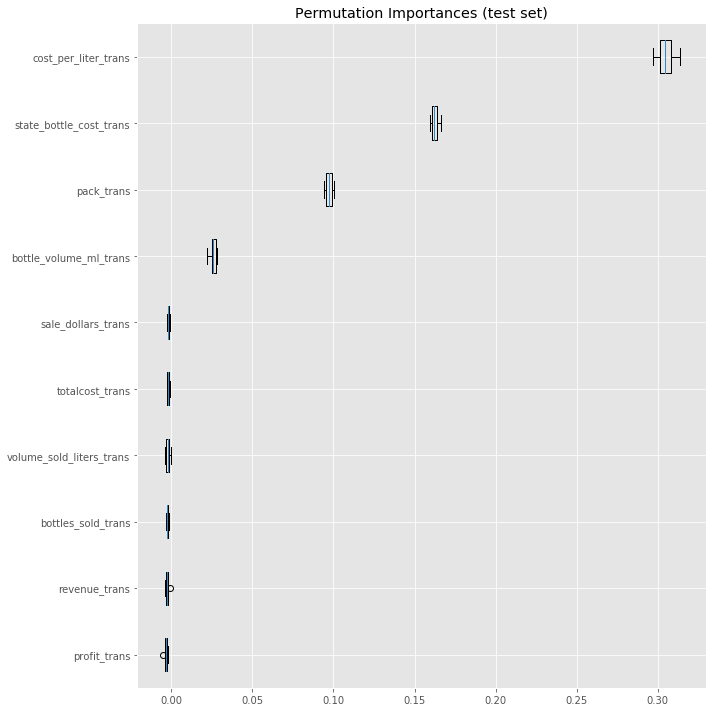

In [188]:
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X2.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

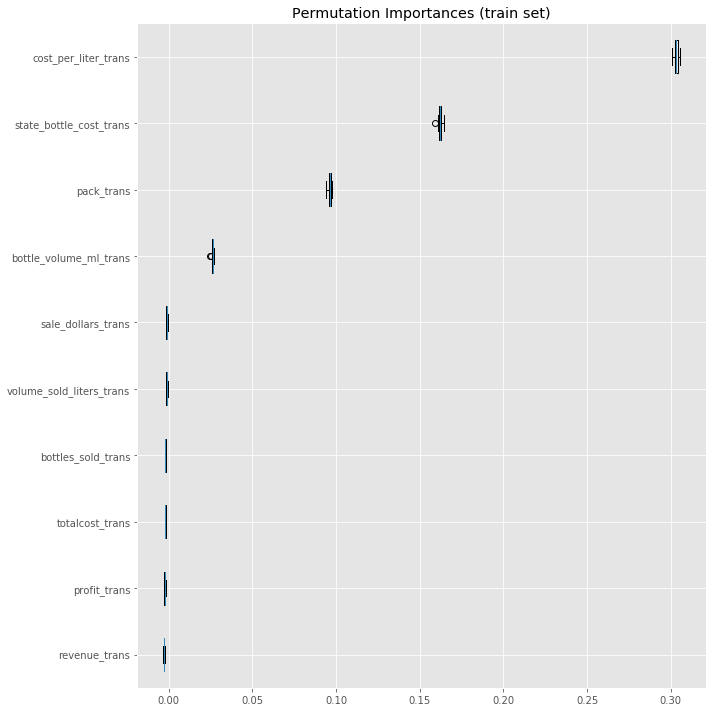

In [189]:
result = permutation_importance(classifierEstimaterRF1, X1_train, y1_train, n_repeats=10,
                                random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X2.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

## Task 2 (Store Data)

Our second model we will be exploring will be a binary classification of the Hy- Vee store which appeared to be the most popular alcohol seller on our list. Before we move forward, we will need to use our one hot encoded dataset wtih store names. We want to be able to classify which of our sales are Hy-Vee sales.

(40000, 12)


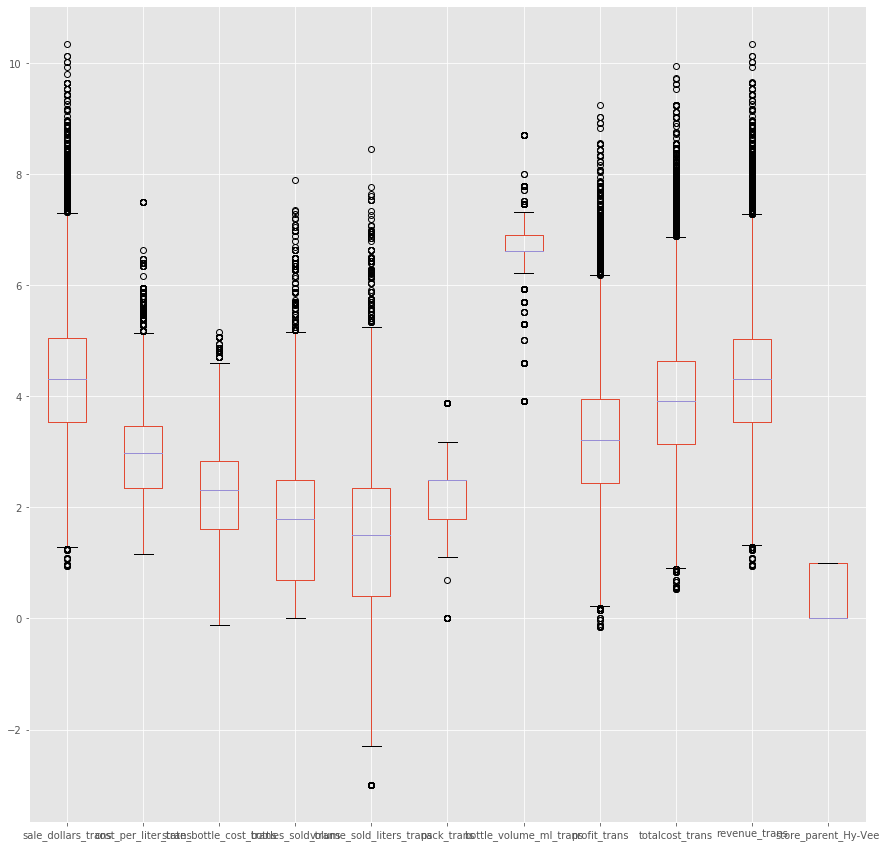

In [190]:
# Since we transformed a number of continuous variables, we can drop them so that we are working directly on our normalized data


# Remove unwanted columns, which include all the specific liquor categories, 
# except for liquor_category_WHISKY since that is what we want to classify on, along
# with all the store_ attributes
"""
cat_vars=['counter', 'liquor_category', 'store_parent',
 'month', 'year', 'monthyear', 'liquor_category_AMARETTO', 'liquor_category_BRANDY', 'liquor_category_GIN', 
 'liquor_category_LIQUEUR', 'liquor_category_Other', 'liquor_category_RUM', 'liquor_category_SCHNAPPS', 
 'liquor_category_TEQUILA', 'liquor_category_VODKA', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb',
 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 
 'store_parent_CVS', 'store_parent_Caseys', 'store_parent_Hy-Vee', 'store_parent_Kum&Go', 
 'store_parent_Other', 'store_parent_QuikTrip', 'store_parent_SamsClub', 'store_parent_SmokingJoes', 
 'store_parent_Target', 'store_parent_Wal-Mart', 'store_parent_Walgreens']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
"""
#keep our transformed detail, along with the timing and store name detail

to_keep=['sale_dollars_trans', 'cost_per_liter_trans', 
      'state_bottle_cost_trans', 'bottles_sold_trans',
       'volume_sold_liters_trans','pack_trans', 'bottle_volume_ml_trans', 
       'profit_trans', 'totalcost_trans', 'revenue_trans', 'id_label', 'store_parent_Hy-Vee']
data_final2=data[to_keep]
data_final2.columns.values

#boxplot of all the variables
plt.figure(figsize=(15, 15))
ax = data_final2.boxplot()
#ax.set_yscale('log')

print(data_final2.shape)

In [191]:
#cholesterol percentage split
(data_final2['store_parent_Hy-Vee'].value_counts()/len(data_final2))*100

0    60.905
1    39.095
Name: store_parent_Hy-Vee, dtype: float64

For our data training set, we will use a stratified k-fold cross validation method which will help to balance the ratio of labels used without having to run a SMOTE which was done previously. Our store_parent_Hy-Vee variable has roughly a 60 - 40% split, and with a data set of 40k, we will have a high enough level of confidence of a random split with the stratefied techniques. This method will cycle 10 tiems around so that all of the data can be used as a hold out as well as a training data set. 

Like previously, we will use the SMOTE technique to generate new samples to help balance the instances from Hy-Vee with the instances that were not from Hy-Vee and avoid overfitting. 

For this task, we will use accuracy as a key metric to evvaluate the models which are KNN, SVM and Random Forest.

### Task 2 Data Preparation


In [192]:

from sklearn.model_selection import StratifiedKFold
from sklearn import metrics as mt
cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=101)
#separating input data into two parts X (features) and Y (target)
features2 = ['sale_dollars_trans', 'cost_per_liter_trans', 
       'state_bottle_cost_trans', 'bottles_sold_trans',
       'volume_sold_liters_trans', 'pack_trans', 'bottle_volume_ml_trans',
       'profit_trans', 'totalcost_trans', 'revenue_trans']

Xt2 = data_final2[features2].copy()

scaler = StandardScaler()
scaler.fit(Xt2)

#This makes our model's coefficients take on the same scale for accurate feature importance analysis
#Notice we scaled the data before the cross validation
Xt = scaler.transform(Xt2)

Yt2= data_final2[['store_parent_Hy-Vee']].copy()
Yt2.shape

(40000, 1)

### Task 2 - Modeling and Evaluation 3
Create four different classification/regression models for each task (e.g., decision tree, random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!

We tried 4 different algorithms to create a model which has superior prediction capabilities based on the ROC/AUC scoring parameter:

*   Support Vector Machine
*   KNN
*   Random Forest Classification
*   Decision Tree Classifier

A ROC/AUC plot will be created for each model and summarized our findings based on the combined results for these different models.

#### Model 1: Support vector Machine

In [193]:

#SVM_SGD 10-fold cross-validation 

param_grid = { 'loss': ['modified_huber']
              ,'penalty':['l2']
              ,'alpha': [0.01, 0.1, 1, 10]
              ,'class_weight': ['balanced', None]
              ,'random_state': [101]
              ,'max_iter':[1000,1500]
              
             }
clf_SVM_t2 = SGDClassifier()
#Create a grid search object using the above parameters 
from sklearn.model_selection import GridSearchCV
SVMGridSearch_t2 = GridSearchCV(clf_SVM_t2, param_grid=param_grid, cv=cv,n_jobs=8, verbose=1, scoring='roc_auc' )

#Perform hyperparameter search to find the best combination of parameters for our data
SVMGridSearch_t2.fit(Xt,y=Yt2.values.ravel())
y_SVM_score_t2 = SVMGridSearch_t2.predict(Xt)

y_SVM_prob_t2=SVMGridSearch_t2.predict_proba(Xt)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=8)]: Done 160 out of 160 | elapsed:   10.8s finished


In [194]:
classifierEstimaterSVM_t2 =SVMGridSearch_t2.best_estimator_
classifierEstimaterSVM_t2

SGDClassifier(alpha=1, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
              learning_rate='optimal', loss='modified_huber', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=101, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [195]:
def EvaluateClassifierEstimator_t2(classifierEstimator, X, Y, cv):



#Perform cross validation 
    scores = cross_validate(classifierEstimator, X, Y,
                            scoring=['accuracy', 'precision','recall'], 
                            cv=cv, return_train_score=True, 
                            )

    Accavg = scores['test_accuracy'].mean()
    Preavg = scores['test_precision'].mean()
    Rreavg = scores['test_recall'].mean()

    print_str = "The average accuracy for all cv folds is: \t\t\t {Accavg:.5}"
    print_str2 = "The average precision for all cv folds is: \t\t\t {Preavg:.5}"
    print_str3 = "The average Recall for all cv folds is: \t\t\t {Rreavg:.5}"

    print(print_str.format(Accavg=Accavg))
    print(print_str2.format(Preavg=Preavg))
    print(print_str3.format(Rreavg=Rreavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['Accuracy'] = scores['test_accuracy']
    scoresResults['Precision'] = scores['test_precision']
    scoresResults['Recall'] = scores['test_recall']
    print(scoresResults)
    return scoresResults

SVM_scores_t2 = EvaluateClassifierEstimator_t2(classifierEstimaterSVM_t2,Xt,Yt2,cv)


The average accuracy for all cv folds is: 			 0.60885
The average precision for all cv folds is: 			 0.325
The average Recall for all cv folds is: 			 0.00063951
*********************************************************
Cross Validation Fold Mean Error Scores
   Accuracy  Precision    Recall
0   0.60900   0.333333  0.000640
1   0.60950   0.666667  0.001280
2   0.60900   0.500000  0.000639
3   0.60925   0.666667  0.001279
4   0.60875   0.333333  0.000639
5   0.60900   0.000000  0.000000
6   0.60900   0.500000  0.001279
7   0.60825   0.000000  0.000000
8   0.60825   0.000000  0.000000
9   0.60850   0.250000  0.000639


Looking at our cross validation of the SVMs, we can see a ton of inconsistency with our precision and recall, despite the high accuracy. this would suggest that SVM is selecting 0s for each value. 

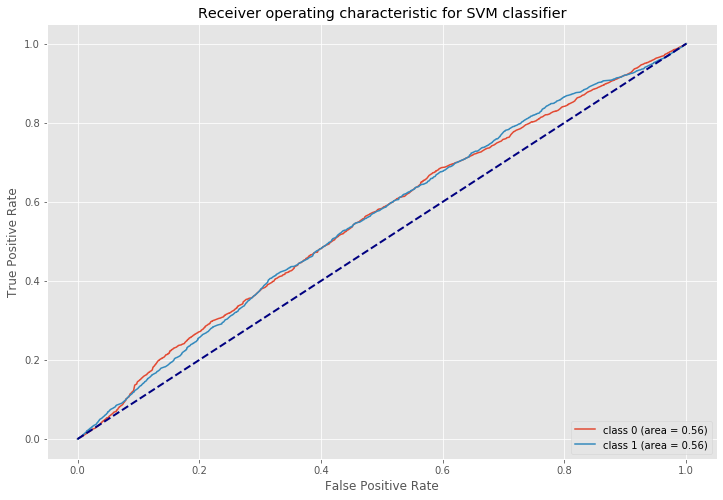

In [196]:
from sklearn.metrics import roc_curve, auc
fprSVM_t2 = dict()
tprSVM_t2 = dict()
roc_auc_SVM_t2 = dict()
for i in np.unique(Yt2):
    fprSVM_t2[i], tprSVM_t2[i], _ = mt.roc_curve(Yt2, y_SVM_prob_t2[:,i], pos_label=i)
    roc_auc_SVM_t2[i] = mt.auc(fprSVM_t2[i], tprSVM_t2[i])
plt.figure(figsize=(12,8));    
for i in np.unique(Yt2):
    plt.plot(fprSVM_t2[i], tprSVM_t2[i], label= ('class %d (area = %0.2f)' % (i, roc_auc_SVM_t2[i])))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.title('Receiver operating characteristic for SVM classifier')
plt.legend(loc="lower right")  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

As noted below, we can see through our ROC curve that our model is not performing much greater than a random guess would. 

In [197]:
EvaluateClassifierEstimator2(classifierEstimaterSVM_t2, Xt, Yt2, cv)


              precision    recall  f1-score   support

           0       0.61      1.00      0.76     24362
           1       0.36      0.00      0.00     15638

    accuracy                           0.61     40000
   macro avg       0.48      0.50      0.38     40000
weighted avg       0.51      0.61      0.46     40000

[[24344    18]
 [15628    10]]
0.60885


#### Model 2 KNN Classification with Grid Search

In [198]:
param_grid = [
    {
         'weights': ['uniform','distance'],
         'leaf_size': [10,30],
         'metric': ['minkowski','euclidean'],
         'n_neighbors':[13,15,17],
         
    }
]
clf_KNN_t2 = KNeighborsClassifier()
grid_search_KNN_t2 = GridSearchCV(clf_KNN_t2, param_grid=param_grid,cv=cv,n_jobs=8, verbose=1, scoring='roc_auc' )

KNearest_model_t2 = grid_search_KNN_t2.fit(Xt, Yt2.values.ravel())
y_KNN_score_t2 = grid_search_KNN_t2.predict(Xt)

y_KNN_prob_t2=grid_search_KNN_t2.predict_proba(Xt)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    7.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   36.0s
[Parallel(n_jobs=8)]: Done 240 out of 240 | elapsed:   45.4s finished


In [199]:
classifierEstimaterKNN_t2 = KNearest_model_t2.best_estimator_
classifierEstimaterKNN_t2

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='distance')


The GridSearch algorithm determined the following optimal parameters for K-Neighbors model.

Leaf-Size: 10
Number of Neighbors: 17

Distance Matric: Minkowski

Weights: Distance

In [200]:
KNearest_scores_t2 = EvaluateClassifierEstimator(classifierEstimaterKNN_t2,Xt,Yt2,cv=cv)


The average accuracy for all cv folds is: 			 0.64325
The average precision for all cv folds is: 			 0.561
The average Recall for all cv folds is: 			 0.40414
*********************************************************
Cross Validation Fold Mean Error Scores
   Accuracy  Precision    Recall
0   0.63500   0.544358  0.404351
1   0.63525   0.545139  0.401791
2   0.64275   0.560000  0.402813
3   0.65050   0.577570  0.395141
4   0.65575   0.586334  0.406010
5   0.63925   0.556070  0.383632
6   0.64525   0.565492  0.400256
7   0.63725   0.547360  0.417519
8   0.63700   0.548780  0.402813
9   0.65450   0.578856  0.427110


As opposed to the SVM, we can see the KNN was much better at being a model with a more consistent precision and recall hovering in the 50s and 40s. 

In [201]:
EvaluateClassifierEstimator2(classifierEstimaterKNN_t2, Xt,Yt2,cv=cv)


              precision    recall  f1-score   support

           0       0.68      0.80      0.73     24362
           1       0.56      0.40      0.47     15638

    accuracy                           0.64     40000
   macro avg       0.62      0.60      0.60     40000
weighted avg       0.63      0.64      0.63     40000

[[19410  4952]
 [ 9318  6320]]
0.64325


Average accuracy was also strong at 64, better than our svm. 

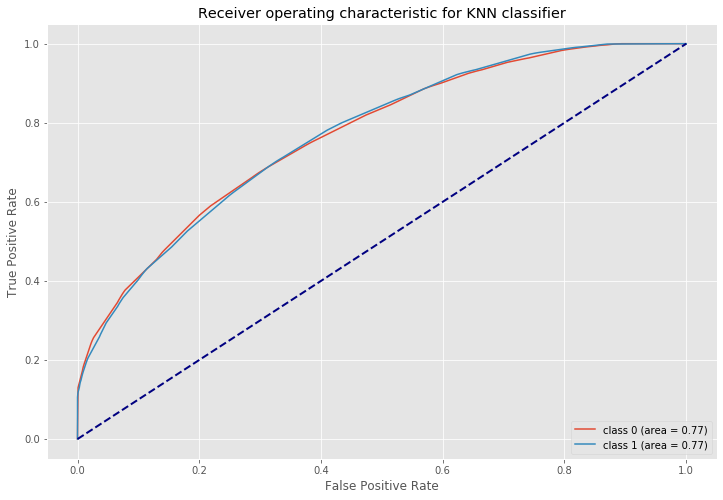

In [202]:

fprKNN_t2 = dict()
tprKNN_t2 = dict()
roc_auc_KNN_t2 = dict()
for i in np.unique(Yt2):
    fprKNN_t2[i], tprKNN_t2[i], _ = mt.roc_curve(Yt2, y_KNN_prob_t2[:, i], pos_label=i)
    roc_auc_KNN_t2[i] = mt.auc(fprKNN_t2[i], tprKNN_t2[i])
plt.figure(figsize=(12,8));    
for i in np.unique(Yt2):
    plt.plot(fprKNN_t2[i], tprKNN_t2[i], label= ('class %d (area = %0.2f)' % (i, roc_auc_KNN_t2[i])))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.title('Receiver operating characteristic for KNN classifier')
plt.legend(loc="lower right")  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

The nice bow shape we are seeing here is showing that the KNN is doing some work in accurately predicting the store the sale was made. 

#### Model 3 Random Forest

In [203]:
param_grid = [
    {
         'n_estimators': [200, 500], 
         'max_depth': [5,10,15],
         'random_state':[101]
     }
]

clf_RF_t2 = RandomForestClassifier()
grid_search_RF_t2 = GridSearchCV(clf_RF_t2, param_grid=param_grid, cv=cv,n_jobs=8, verbose=1, scoring='roc_auc' )

RandomForest_model_t2 = grid_search_RF_t2.fit(Xt, Yt2.values.ravel())

y_RF_score_t2 = grid_search_RF_t2.predict(Xt)
y_RF_prob_t2=grid_search_RF_t2.predict_proba(Xt)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  4.3min
[Parallel(n_jobs=8)]: Done  60 out of  60 | elapsed:  8.7min finished


In [204]:
classifierEstimaterRF_t2 = RandomForest_model_t2.best_estimator_
classifierEstimaterRF_t2

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [205]:
Random_Forest_scores_t2 = EvaluateClassifierEstimator(classifierEstimaterRF_t2,Xt,Yt2,cv=cv)


The average accuracy for all cv folds is: 			 0.65403
The average precision for all cv folds is: 			 0.58846
The average Recall for all cv folds is: 			 0.38253
*********************************************************
Cross Validation Fold Mean Error Scores
   Accuracy  Precision    Recall
0   0.64950   0.579624  0.374920
1   0.65775   0.595850  0.385797
2   0.65900   0.597276  0.392583
3   0.65725   0.596211  0.382353
4   0.65375   0.587317  0.384910
5   0.64450   0.571000  0.365090
6   0.65100   0.579395  0.391944
7   0.65375   0.590863  0.372123
8   0.65075   0.583584  0.372762
9   0.66300   0.603448  0.402813


With the RF, we can see a bit smaller recall, but the precision is a hair higher than the KNN, but overall the model's accuracy is in the ballpark.

In [206]:
EvaluateClassifierEstimator2(classifierEstimaterRF_t2,Xt,Yt2,cv=cv)


              precision    recall  f1-score   support

           0       0.68      0.83      0.74     24362
           1       0.59      0.38      0.46     15638

    accuracy                           0.65     40000
   macro avg       0.63      0.61      0.60     40000
weighted avg       0.64      0.65      0.63     40000

[[20179  4183]
 [ 9656  5982]]
0.654025


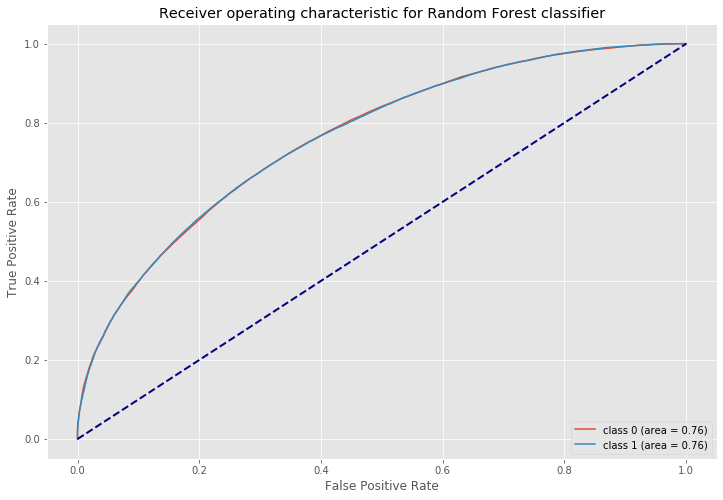

In [207]:
# create ROC cuve for Random Forest model:
fprRF_t2 = dict()
tprRF_t2 = dict()
roc_auc_RF_t2 = dict()
for i in np.unique(Yt2):
    fprRF_t2[i], tprRF_t2[i], _ = mt.roc_curve(Yt2, y_RF_prob_t2[:, i], pos_label=i)
    roc_auc_RF_t2[i] = mt.auc(fprRF_t2[i], tprRF_t2[i])
plt.figure(figsize=(12,8));    
for i in np.unique(Yt2):
    plt.plot(fprRF_t2[i], tprRF_t2[i], label= ('class %d (area = %0.2f)' % (i, roc_auc_RF_t2[i])))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.title('Receiver operating characteristic for Random Forest classifier')
plt.legend(loc="lower right")  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Model 4 Decision Tree Classifier

In [208]:
param_grid = [
    {
         'max_depth': [5,10],
         'random_state':[101] 
     }
]

clf_DT_t2 = DecisionTreeClassifier()


grid_searchDT_t2 = GridSearchCV(clf_DT_t2, param_grid=param_grid, cv=cv,n_jobs=-1, verbose=1, scoring='roc_auc')


# # Here we are training the model, this is 
# # what takes the most amount of time to run
DT_model_t2 = grid_searchDT_t2.fit(Xt, Yt2.values.ravel())

y_DT_score_t2 = grid_searchDT_t2.predict(Xt)
y_DT_prob_t2 = grid_searchDT_t2.predict_proba(Xt)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.4s finished


In [209]:
classifierEstimaterDT_t2 = DT_model_t2.best_estimator_
classifierEstimaterDT_t2

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')

In [210]:
DT_scores_t2 = EvaluateClassifierEstimator(classifierEstimaterDT_t2,Xt,Yt2,cv=10)


The average accuracy for all cv folds is: 			 0.45267
The average precision for all cv folds is: 			 0.31703
The average Recall for all cv folds is: 			 0.28414
*********************************************************
Cross Validation Fold Mean Error Scores
   Accuracy  Precision    Recall
0   0.55575   0.425070  0.388356
1   0.43425   0.349785  0.521433
2   0.44025   0.292818  0.304987
3   0.29475   0.180802  0.227621
4   0.31400   0.182112  0.216113
5   0.43475   0.194030  0.141304
6   0.35725   0.242455  0.303069
7   0.49700   0.354167  0.347826
8   0.60675   0.490683  0.151535
9   0.59200   0.458333  0.239130


In [211]:
EvaluateClassifierEstimator2(classifierEstimaterDT_t2,Xt,Yt2, cv)


              precision    recall  f1-score   support

           0       0.66      0.84      0.74     24362
           1       0.57      0.32      0.41     15638

    accuracy                           0.64     40000
   macro avg       0.61      0.58      0.58     40000
weighted avg       0.62      0.64      0.61     40000

[[20544  3818]
 [10616  5022]]
0.63915


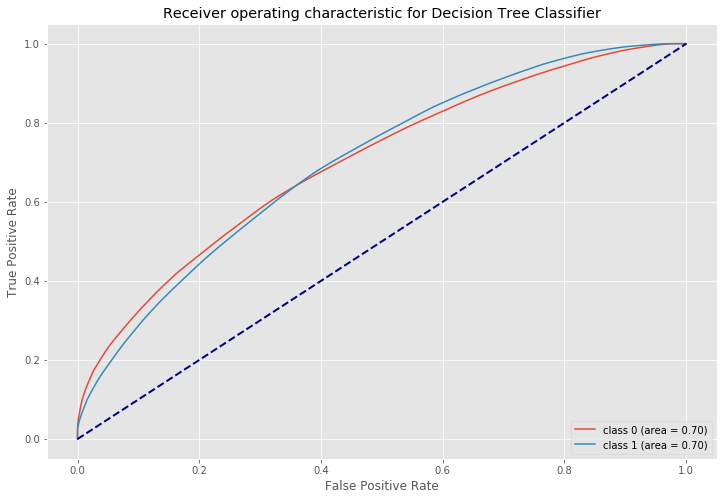

In [212]:
# create ROC curve for  Decision Tree Classifier:
fprDT_t2 = dict()
tprDT_t2 = dict()
roc_auc_DT_t2 = dict()
for i in np.unique(Yt2):
    fprDT_t2[i], tprDT_t2[i], _ = mt.roc_curve(Yt2, y_DT_prob_t2[:, i], pos_label=i)
    roc_auc_DT_t2[i] = mt.auc(fprDT_t2[i], tprDT_t2[i])
plt.figure(figsize=(12,8));    
for i in np.unique(Yt2):
    plt.plot(fprDT_t2[i], tprDT_t2[i], label= ('class %d (area = %0.2f)' % (i, roc_auc_DT_t2[i])))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.title('Receiver operating characteristic for Decision Tree Classifier')
plt.legend(loc="lower right")  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Model 5: XG Boost Classifier

In [0]:
__author__ = 'Tilii: https://kaggle.com/tilii7' 

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier


Adapted from https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost

Let's run a timer to see how long our model takes to run.

In [0]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

Set up a parameter grid for the XGBoost that will have an exhaustive exploration in our XG boost model. The total number of combinations we will explore will be 405 X5 to account for the 5 fold cross validation we will use, so 2020 total combinations.

In [0]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

Next, let's set up our classifier using the API of theXG boost, which is a requirement for the grid search.



In [0]:
xgb_t2 = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)


From here, we wills et up the stratefied folds for our grid search parameters, here will will do 5 folds for 5 param combos. . The param combo declares how many different combinations should be picked out of the 405 we previously discussed.

In [217]:
folds = 10
param_comb = 5

skf_t2 = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb_t2, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf_t2.split(Xt,Yt2), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
XGB_t2 = random_search.fit(Xt, Yt2.values.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  4.7min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  9.2min finished



 Time taken: 0 hours 9 minutes and 30.66 seconds.


In [0]:

# # Here we are training the model, this is 
# # what takes the most amount of time to run


y_XGB_score_t2 = random_search.predict(Xt)
y_XGB_prob_t2 = random_search.predict_proba(Xt)

In [219]:

classifierEstimaterXGB_t2 = XGB_t2.best_estimator_
classifierEstimaterXGB_t2

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5,
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.6, verbosity=1)

After running a grid search on our hyper parameters, the search told us that the optimal tree has a base score of 0.5 with a gbtree booster, which essentialliy is a modified version of decision trees.

In [220]:
XGB_scores_t2 = EvaluateClassifierEstimator(classifierEstimaterXGB_t2,Xt,Yt2,cv=cv)


The average accuracy for all cv folds is: 			 0.65005
The average precision for all cv folds is: 			 0.60189
The average Recall for all cv folds is: 			 0.30976
*********************************************************
Cross Validation Fold Mean Error Scores
   Accuracy  Precision    Recall
0   0.64875   0.603133  0.295585
1   0.64825   0.598237  0.303903
2   0.65550   0.613139  0.322251
3   0.65025   0.602996  0.308824
4   0.64775   0.596996  0.304987
5   0.65375   0.610086  0.317136
6   0.64225   0.581395  0.303708
7   0.65250   0.609848  0.308824
8   0.64925   0.599016  0.311381
9   0.65225   0.604091  0.320972


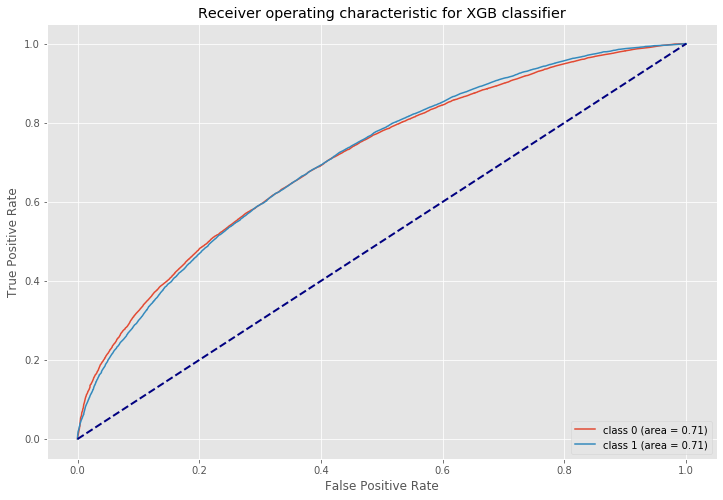

In [231]:
fprXGB_t2 = dict()
tprXGB_t2 = dict()
roc_auc_XGB_t2 = dict()
for i in np.unique(Yt2):
    fprXGB_t2[i], tprXGB_t2[i], _ = mt.roc_curve(Yt2, y_XGB_prob_t2[:, i], pos_label=i)
    roc_auc_XGB_t2[i] = mt.auc(fprXGB_t2[i], tprXGB_t2[i])
plt.figure(figsize=(12,8));    
for i in np.unique(Yt2):
    plt.plot(fprXGB_t2[i], tprXGB_t2[i], label= ('class %d (area = %0.2f)' % (i, roc_auc_XGB_t2[i])))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.title('Receiver operating characteristic for XGB classifier')
plt.legend(loc="lower right")  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

After running our XGBoost, we are able to get a class 0 and 1 area of 0.71 across the board. Looking back at the previous models, it did not perform as well as our Random Forest classification model or KNN which scored in the mid 0.70s.



### Task 2 - Modeling and Evaluation 4  
Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.


The best model accuracy was Random Forest Classification at 65.4%, the highest of 4 models evaluated.

We plotted the 4 ROC curves on graphs. The shape of each ROC curve is not the same for all suggesting some models are better at producting classes of alcohol. KNN has the largest area under the curve suggesting it is the best of the 4.

Since KNN and Random Forest each have metrics that are better than each other depending on which metric is being viewed.  The decision would have to be made to choose which metric is most important. Because we want to be sure to identify true Hy-Vee sales precision is probably the most important metric. Therefore, precision along with accuracy, combined with a minimally different ROC makes the decision for Random Forest. 

In [232]:
list2 = []
list2.append(("Model 1", "SVM",60.8,32.5,0,46))
list2.append(("Model 2", "KNN",64.32,56.1,40.4,63))
list2.append(("Model 3", "Random Forest",65.4,58.8,38.5,63))
list2.append(("Model 4", "Decision Tree", 45.27, 31.7, 28.4, 61))
dfobj = pd.DataFrame(list2, columns = ['Model Number', 'Model','Accuracy' , 'Precision', 'Recall', 'F1'], index=['0', '1', '2', '3'])
dfobj

,Model Number,Model,Accuracy,Precision,Recall,F1
0,Model 1,SVM,60.80,32.5,0.0,46
1,Model 2,KNN,64.32,56.1,40.4,63
2,Model 3,Random Forest,65.40,58.8,38.5,63
3,Model 4,Decision Tree,45.27,31.7,28.4,61


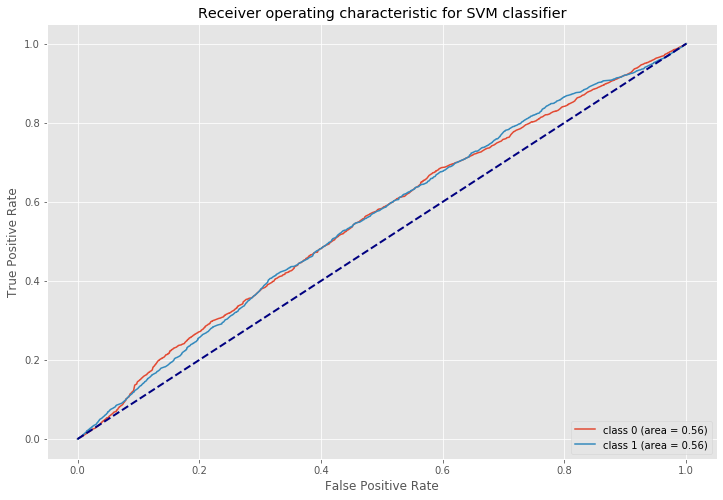

In [233]:

from sklearn.metrics import roc_curve, auc
fprSVM_t2 = dict()
tprSVM_t2 = dict()
roc_auc_SVM_t2 = dict()
for i in np.unique(Yt2):
    fprSVM_t2[i], tprSVM_t2[i], _ = mt.roc_curve(Yt2, y_SVM_prob_t2[:,i], pos_label=i)
    roc_auc_SVM_t2[i] = mt.auc(fprSVM_t2[i], tprSVM_t2[i])
plt.figure(figsize=(12,8));    
for i in np.unique(Yt2):
    plt.plot(fprSVM_t2[i], tprSVM_t2[i], label= ('class %d (area = %0.2f)' % (i, roc_auc_SVM_t2[i])))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.title('Receiver operating characteristic for SVM classifier')
plt.legend(loc="lower right")  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

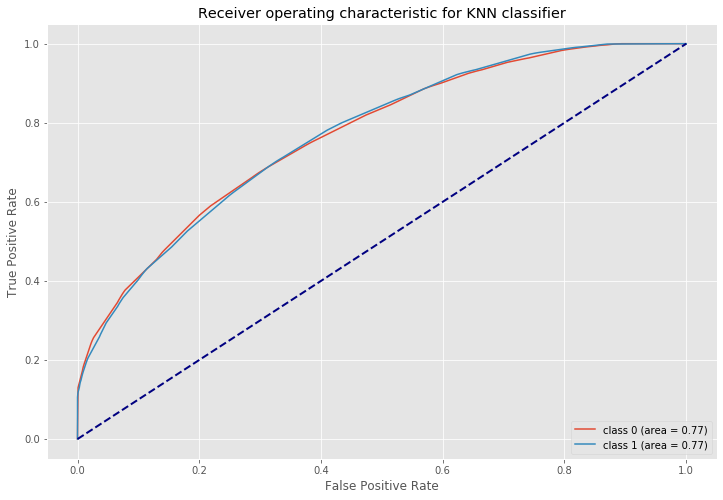

In [234]:

fprKNN_t2 = dict()
tprKNN_t2 = dict()
roc_auc_KNN_t2 = dict()
for i in np.unique(Yt2):
    fprKNN_t2[i], tprKNN_t2[i], _ = mt.roc_curve(Yt2, y_KNN_prob_t2[:, i], pos_label=i)
    roc_auc_KNN_t2[i] = mt.auc(fprKNN_t2[i], tprKNN_t2[i])
plt.figure(figsize=(12,8));    
for i in np.unique(Yt2):
    plt.plot(fprKNN_t2[i], tprKNN_t2[i], label= ('class %d (area = %0.2f)' % (i, roc_auc_KNN_t2[i])))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.title('Receiver operating characteristic for KNN classifier')
plt.legend(loc="lower right")  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

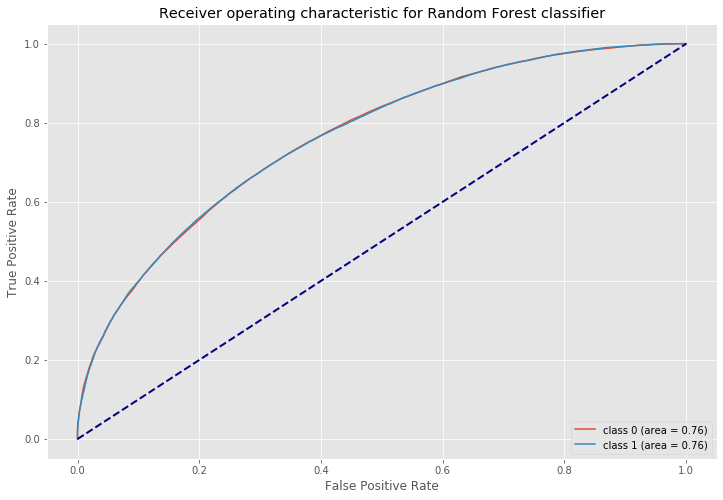

In [235]:
# create ROC cuve for Random Forest model:
fprRF_t2 = dict()
tprRF_t2 = dict()
roc_auc_RF_t2 = dict()
for i in np.unique(Yt2):
    fprRF_t2[i], tprRF_t2[i], _ = mt.roc_curve(Yt2, y_RF_prob_t2[:, i], pos_label=i)
    roc_auc_RF_t2[i] = mt.auc(fprRF_t2[i], tprRF_t2[i])
plt.figure(figsize=(12,8));    
for i in np.unique(Yt2):
    plt.plot(fprRF_t2[i], tprRF_t2[i], label= ('class %d (area = %0.2f)' % (i, roc_auc_RF_t2[i])))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.title('Receiver operating characteristic for Random Forest classifier')
plt.legend(loc="lower right")  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

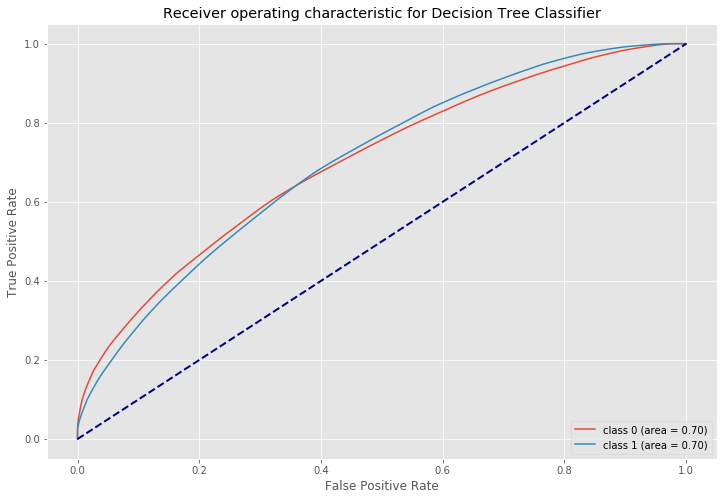

In [236]:
# create ROC curve for  Decision Tree Classifier:
fprDT_t2 = dict()
tprDT_t2 = dict()
roc_auc_DT_t2 = dict()
for i in np.unique(Yt2):
    fprDT_t2[i], tprDT_t2[i], _ = mt.roc_curve(Yt2, y_DT_prob_t2[:, i], pos_label=i)
    roc_auc_DT_t2[i] = mt.auc(fprDT_t2[i], tprDT_t2[i])
plt.figure(figsize=(12,8));    
for i in np.unique(Yt2):
    plt.plot(fprDT_t2[i], tprDT_t2[i], label= ('class %d (area = %0.2f)' % (i, roc_auc_DT_t2[i])))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.title('Receiver operating characteristic for Decision Tree Classifier')
plt.legend(loc="lower right")  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Task 2 - Modeling and Evaluation 5  
Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.

Advantages and overall assumptions for each of the four models we ran for task 2 are outlined below.  

For the SVM model, the main advantage for the SVM model is that it scaled relatively well to the high dimensional data.  Also, since our dataset was not extremely large, around 40K rows, the processing power & time needed was acceptable.

For the KNN model, the main advantage was that it nearly achieved the highest overall AUC score while being very easy to implement with the processing time  much less then the highest scored model of Random Forest.  

For the Random Forest, as similar to task 1, the main advantage was predictability.  This was the best performing model but also required the most processing time.

For the Decision Tree model, this did not perform as well as the KNN or Random Forest.  The main advantage for including this model was that it was very easy to implement and view model metrics.

Lastly as you will see in the code below, the only relationship that is not statistically significant is the relationship between KNN and DT at the 95% level. This is indicated by the fact that the interval range passes through 0 while none of the others do. For the others, this means that they are statistically significant.

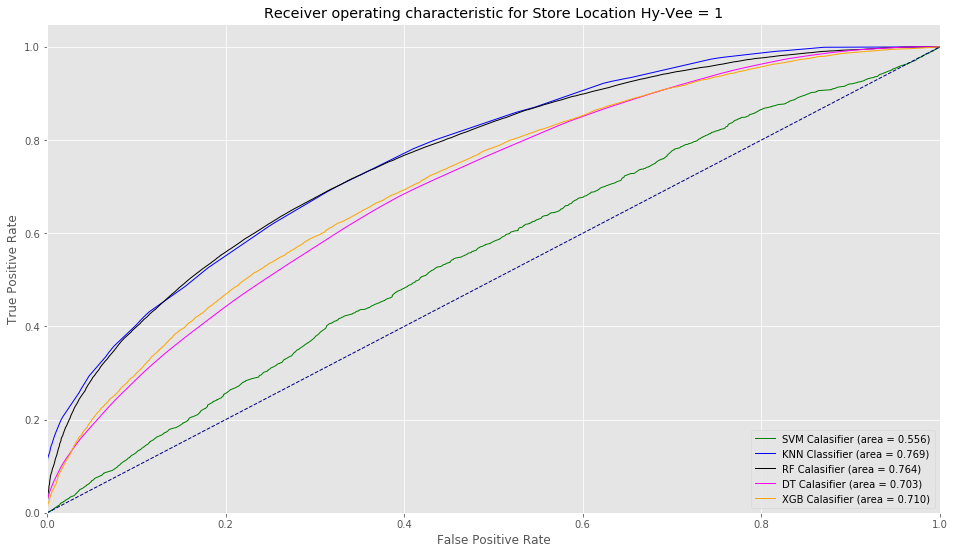

In [237]:
plt.figure(figsize=(16,9));
plt.plot(fprSVM_t2[1], tprSVM_t2[1], color='green', lw=1, label='SVM Calasifier (area = %0.3f)' % roc_auc_SVM_t2[1])
plt.plot(fprKNN_t2[1], tprKNN_t2[1], color='blue', lw=1, label='KNN Classifier (area = %0.3f)' % roc_auc_KNN_t2[1])
plt.plot(fprRF_t2[1], tprRF_t2[1], color='black', lw=1, label='RF Calasifier (area = %0.3f)' % roc_auc_RF_t2[1])
plt.plot(fprDT_t2[1], tprDT_t2[1], color='magenta', lw=1, label='DT Calasifier (area = %0.3f)' % roc_auc_DT_t2[1])
plt.plot(fprXGB_t2[1], tprXGB_t2[1], color='orange', lw=1, label='XGB Calasifier (area = %0.3f)' % roc_auc_XGB_t2[1])
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Store Location Hy-Vee = 1')
plt.legend(loc="lower right")
plt.show()

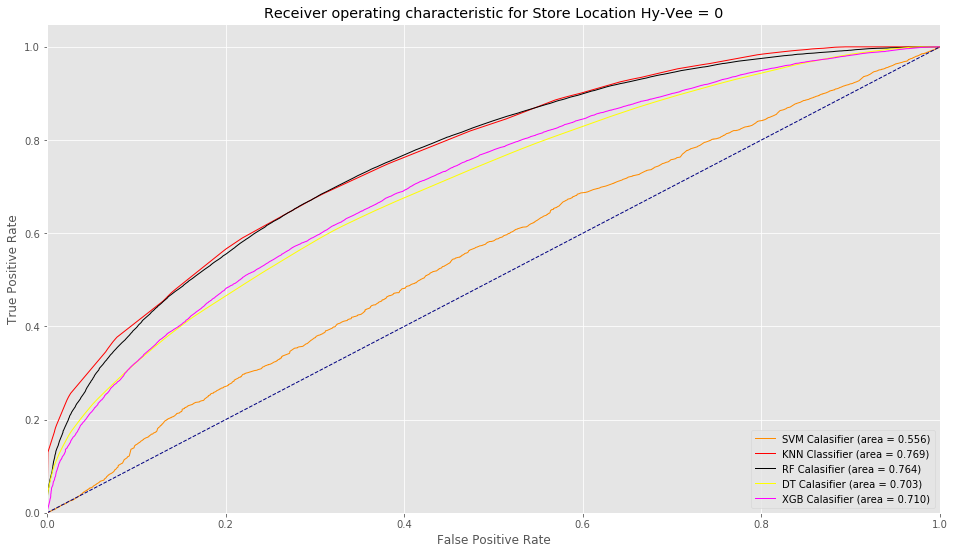

In [238]:
plt.figure(figsize=(16,9));
plt.plot(fprSVM_t2[0], tprSVM_t2[0], color='darkorange', lw=1, label='SVM Calasifier (area = %0.3f)' % roc_auc_SVM_t2[0])
plt.plot(fprKNN_t2[0], tprKNN_t2[0], color='red', lw=1, label='KNN Classifier (area = %0.3f)' % roc_auc_KNN_t2[0])
plt.plot(fprRF_t2[0], tprRF_t2[0], color='black', lw=1, label='RF Calasifier (area = %0.3f)' % roc_auc_RF_t2[0])
plt.plot(fprDT_t2[0], tprDT_t2[0], color='yellow', lw=1, label='DT Calasifier (area = %0.3f)' % roc_auc_DT_t2[0])
plt.plot(fprXGB_t2[0], tprXGB_t2[0], color='magenta', lw=1, label='XGB Calasifier (area = %0.3f)' % roc_auc_XGB_t2[0])

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Store Location Hy-Vee = 0')
plt.legend(loc="lower right")
plt.show()

#### Statistical Comparisons of Classifiers

In [0]:
from sklearn.model_selection import cross_val_score

acc_SVM_t2 = cross_val_score(classifierEstimaterSVM_t2, Xt, y=Yt2, cv=cv)
acc_KNN_t2 = cross_val_score(classifierEstimaterKNN_t2, Xt, y=Yt2, cv=cv)
acc_RF_t2 = cross_val_score(classifierEstimaterRF_t2, Xt, y=Yt2, cv=cv)
acc_DT_t2 = cross_val_score(classifierEstimaterDT_t2, Xt, y=Yt2, cv=cv)
acc_XGB_t2 = cross_val_score(classifierEstimaterXGB_t2, Xt, y=Yt2, cv=cv)

In [240]:
print ('accuracy for SVM classifier is :', acc_SVM_t2)
print ('accuracy for KNN classifier is :',acc_KNN_t2)
print ('accuracy for Random Forest classifier is :',acc_RF_t2)
print ('accuracy for Decision Tree Classifier is :',acc_DT_t2)
print ('accuracy for Decision Tree Classifier is :',acc_XGB_t2)

accuracy for SVM classifier is : [0.609   0.6095  0.609   0.60925 0.60875 0.609   0.609   0.60825 0.60825
 0.6085 ]
accuracy for KNN classifier is : [0.635   0.63525 0.64275 0.6505  0.65575 0.63925 0.64525 0.63725 0.637
 0.6545 ]
accuracy for Random Forest classifier is : [0.6495  0.65775 0.659   0.65725 0.65375 0.6445  0.651   0.65375 0.65075
 0.663  ]
accuracy for Decision Tree Classifier is : [0.64575 0.63875 0.6445  0.63075 0.6425  0.6315  0.6365  0.64125 0.64325
 0.63675]
accuracy for Decision Tree Classifier is : [0.64875 0.64825 0.6555  0.65025 0.64775 0.65375 0.64225 0.6525  0.64925
 0.65225]


In [242]:
t = 2.26 / np.sqrt(10)

e_SVM_KNN_t2 = (1-acc_SVM_t2)-(1-acc_KNN_t2)
e_SVM_RF_t2 = (1-acc_SVM_t2)-(1-acc_RF_t2)
e_SVM_DT_t2 = (1-acc_SVM_t2)-(1-acc_DT_t2)
e_KNN_RF_t2 = (1-acc_KNN_t2)-(1-acc_RF_t2)
e_KNN_DT_t2 = (1-acc_KNN_t2)-(1-acc_DT_t2)
e_RF_DT_t2 = (1-acc_RF_t2)-(1-acc_DT_t2)
e_SVM_XGB_t2 = (1-acc_SVM_t2)-(1-acc_XGB_t2)
e_KNN_XGB_t2 = (1-acc_KNN_t2)-(1-acc_XGB_t2)
e_RF_XGB_t2 = (1-acc_RF_t2)-(1-acc_XGB_t2)
e_XGB_DT_t2 = (1-acc_XGB_t2)-(1-acc_DT_t2)


stdtot_S_K_t2 = np.std(e_SVM_KNN_t2)
stdtot_S_R_t2 = np.std(e_SVM_RF_t2)
stdtot_S_D_t2 = np.std(e_SVM_DT_t2)
stdtot_K_R_t2 = np.std(e_KNN_RF_t2)
stdtot_K_D_t2 = np.std(e_KNN_DT_t2)
stdtot_R_D_t2 = np.std(e_RF_DT_t2)
stdtot_S_X_t2 = np.std(e_SVM_XGB_t2)
stdtot_K_X_t2 = np.std(e_KNN_XGB_t2)
stdtot_R_X_t2 = np.std(e_RF_XGB_t2)
stdtot_X_D_t2 = np.std(e_XGB_DT_t2)

dbarSK_t2 = np.mean(e_SVM_KNN_t2)
dbarSR_t2 = np.mean(e_SVM_RF_t2)
dbarSD_t2 = np.mean(e_SVM_DT_t2)
dbarKR_t2 = np.mean(e_KNN_RF_t2)
dbarKD_t2 = np.mean(e_KNN_DT_t2)
dbarRD_t2 = np.mean(e_RF_DT_t2)
dbarSX_t2 = np.mean(e_SVM_XGB_t2)
dbarKX_t2 = np.mean(e_KNN_XGB_t2)
dbarRX_t2 = np.mean(e_RF_XGB_t2)
dbarXD_t2 = np.mean(e_XGB_DT_t2)

print ('Range of SVM_KNN confidence interval:[%0.6f,%0.6f]' % (dbarSK_t2-t*stdtot_S_K_t2,dbarSK_t2+t*stdtot_S_K_t2))
print ('Range of SVM_RF confidence interval:[%0.6f,%0.6f]' % (dbarSR_t2-t*stdtot_S_R_t2,dbarSR_t2+t*stdtot_S_R_t2))
print ('Range of SVM_DT confidence interval:[%0.6f,%0.6f]' % (dbarSD_t2-t*stdtot_S_D_t2,dbarSD_t2+t*stdtot_S_D_t2))
print ('Range of KNN_RF confidence interval:[%0.6f,%0.6f]' % (dbarKR_t2-t*stdtot_K_R_t2,dbarKR_t2+t*stdtot_K_R_t2))
print ('Range of KNN_DT confidence interval:[%0.6f,%0.6f]' % (dbarKD_t2-t*stdtot_K_D_t2,dbarKD_t2+t*stdtot_K_D_t2))
print ('Range of RF_DT confidence interval:[%0.6f,%0.6f]' % (dbarRD_t2-t*stdtot_R_D_t2,dbarRD_t2+t*stdtot_R_D_t2))
print ('Range of SVM_XGB confidence interval:[%0.6f,%0.6f]' % (dbarSX_t2-t*stdtot_S_X_t2,dbarSX_t2+t*stdtot_S_X_t2))
print ('Range of KNN_XGB confidence interval:[%0.6f,%0.6f]' % (dbarKX_t2-t*stdtot_K_X_t2,dbarKX_t2+t*stdtot_K_X_t2))
print ('Range of RF_XGB confidence interval:[%0.6f,%0.6f]' % (dbarRX_t2-t*stdtot_R_X_t2,dbarRX_t2+t*stdtot_R_X_t2))
print ('Range of XGB_DT confidence interval:[%0.6f,%0.6f]' % (dbarXD_t2-t*stdtot_X_D_t2,dbarXD_t2+t*stdtot_X_D_t2))


Range of SVM_KNN confidence interval:[0.029015,0.039785]
Range of SVM_RF confidence interval:[0.041527,0.048823]
Range of SVM_DT confidence interval:[0.026646,0.033954]
Range of KNN_RF confidence interval:[0.005910,0.015640]
Range of KNN_DT confidence interval:[-0.011371,0.003171]
Range of RF_DT confidence interval:[-0.019838,-0.009912]
Range of SVM_XGB confidence interval:[0.038596,0.043804]
Range of KNN_XGB confidence interval:[0.000697,0.012903]
Range of RF_XGB confidence interval:[-0.007964,0.000014]
Range of XGB_DT confidence interval:[-0.015252,-0.006548]


According to the intervals above, the only relationship that is not statistically significant is the relationship between KNN and DT as well as teh RF/XGB at the 95% level. This is indicated by the fact that the interval range passes through 0 while none of the others do not. For the others, this means that their difference is statistically significant. 

### Task 2 - Modeling and Evaluation 6  
Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.

As you will see in the charts below, the cost_per_liter_trans is the most important feature, followed by state_bottle_cost_trans, sale_dollars_trans, and totalcost_trans.  

This correlates well with our assumptions since typically small businesses may have a higher cost per liter on their products as compared to big box retailers due to the volume of sales.  The other three important features also deal with the cost of the sale, so it would also make sense that the model has identified a correlation of how much the liquor costs and whether or not the sale was from a Hy-Vee vs Non-Hy-Vee store.

In [0]:
feature_names_t2 = X2_t2.columns.values.tolist()

In [252]:
feature_names_t2

['sale_dollars_trans',
 'cost_per_liter_trans',
 'state_bottle_cost_trans',
 'bottles_sold_trans',
 'volume_sold_liters_trans',
 'pack_trans',
 'bottle_volume_ml_trans',
 'profit_trans',
 'totalcost_trans',
 'revenue_trans']

In [253]:
# set the parameters of this estimator and fit the model

classifierEstimaterRF_t2.fit(Xt, Yt2.values.ravel())

coef_t2 = classifierEstimaterRF_t2.feature_importances_

X2_t2 = data_final2[features2].copy()

#feature_names_t2=list2(X2_t2.columns.values)

#Creates a new dataframe with the coefficients and the features 
Top_Features_t2 = pd.DataFrame({'feature_names':feature_names_t2, 'weights':coef_t2})
print("The Top Feature are the following")
display(Top_Features_t2.sort_values(by='weights', ascending=False))

The Top Feature are the following


,feature_names,weights
1,cost_per_liter_trans,0.153143
2,state_bottle_cost_trans,0.148638
0,sale_dollars_trans,0.127154
8,totalcost_trans,0.121016
9,revenue_trans,0.119776
7,profit_trans,0.110021
6,bottle_volume_ml_trans,0.070560
4,volume_sold_liters_trans,0.053449
5,pack_trans,0.049740
3,bottles_sold_trans,0.046501


Text(0.5, 0, 'Coefficient Magnitude\n(z-score)')

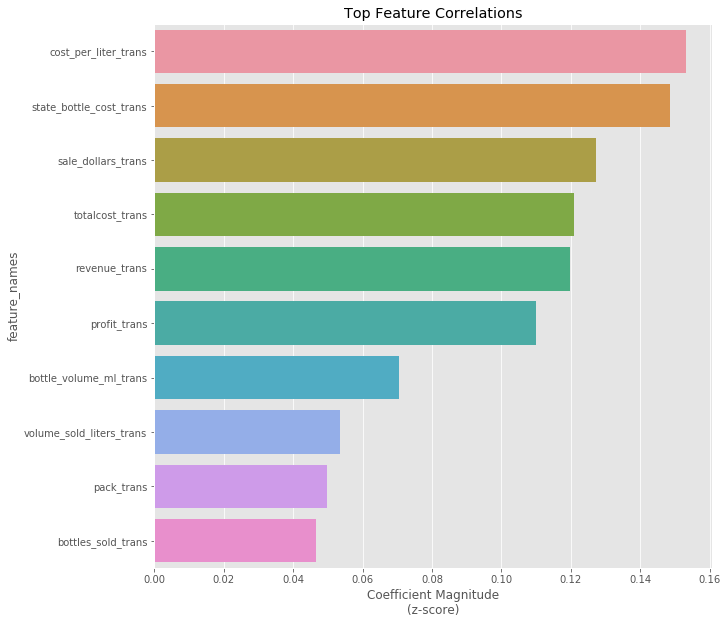

In [254]:
import seaborn as sns
ax = sns.barplot(x =Top_Features_t2['weights'], y = Top_Features_t2.sort_values(by='weights', ascending=False)['feature_names'], 
                 orient= 'h')
ax.set_title("Top Feature Correlations")
ax.set_xlabel("Coefficient Magnitude\n(z-score)")

## Deployment (5 points total)
 
 
**How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)?**

We feel our models would be quite useful for the liquor wholesale industry in having the ability to properly classify which type of liquors are going to be sold based on the order coming in.  This would help provide logistic information when it comes to reordering liquor to prevent stock outs.  In addition to predicting the type of liquor, also knowing which store (big-box like Hy-Vee) vs the smaller chain stores would help provide better customer service.  Wholesalers would be able to staff the call centers appropriately and offer better customer support by having a tiered customer support for larger customers.  So by knowing the order that is coming in, could staff the support appropriately for maximum customer support and profit.
 
 
**How would you measure the model's value if it was used by these parties?**

Overall, we feel the measure of the model’s value would be around increased sales by always having the appropriate liquor on hand to avoid stocks outs.  In addition to revenue, we would measure our customer satisfaction.  Knowing that we could service the large customer big-box retailers with more customer support staff would reduce call-times and improve overall satisfaction.  Lastly, we feel that having our models predict the class of liquor could also lend to upsell/cross sell opportunities.  For example, knowing that a large order of tequila coming in, could also lead to selling margarita mix, salt, speciality glassware. 
 
 
**How would you deploy your model for interested parties?** 

As in individual wholesaler that services the Iowa area, we would deploy our service into the cloud as a REST based API service.  We would have a REST endpoint that we would call from with-in our business logic to help qualify new, incoming orders.  We would also be able to take this information and tie directly into our call-centers so when new, large orders are placed, customer support can reach out and assist.  Using the cloud infrastructure greatly reduces our barrier to entry in having a technology first approach to servicing the liquor industry.  In addition to using internally, we could also open our services up to other wholesalers in the areas for which we have the data.  This would allow us to become not only a liquor distributor, but also a technology leader in servicing the liquor industry; therefore opening up other revenue streams to broaden our portfolio offerings.
 
 
**What other data should be collected? How often would the model need to be updated, etc.?**

Other information that we feel would be beneficial would be per-store sales.  Knowing how often, the location of the sales could be married to census data to better understand customer demographics.  This way, we could help stores reduce inventory, avoid stock outs and service their customers better than they currently are today. 
 


## Exceptional Work (10 points total) 
• You have free reign to provide additional analyses.
• One idea: grid search parameters in a parallelized fashion and visualize the performances
across attributes. Which parameters are most significant for making a good model for each
classification algorithm?

### Exceptional Work 1: XG Boost

For our second task (the store classifier), we ran an XGboost procedure which was not discussed thus far in class. We ran it along with the other models including a grid search and integrated the findings with the rest of the model.

### Exceptional work 2: Voting Ensembles

Adapted from: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html 

Since election season is upon us, it's time for our models to perform their civit duty to best classify the stores we will be exploring. One method of doing so is through a voting ensemble that takes the performance from our previous classifiers to build a wrapped training and testing algorithm or our LR, KNN, DT, RF and XGB Boost model we ran with our location classifier. 

OUr ensemble model will employ the following strategies:
* Majority voting - the class that recieves the largest number of votes will be chosen as the best model. 
* Average Probability: The probability vector for each class is totaled and the mean probability vector is collected, and the winner has the highest value. 


#### Majority Voting

In [245]:

from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

# Training classifiers

#removing SVM because it was overfit
#clf1_t2 = classifierEstimaterSVM_t2

clf2_t2 = classifierEstimaterKNN_t2

clf3_t2 = classifierEstimaterRF_t2

clf4_t2 = classifierEstimaterDT_t2

clf5_t2 = classifierEstimaterXGB_t2

eclf = VotingClassifier(estimators=[('KNN', clf2_t2),
                                    ('RF', clf3_t2),('DT',clf4_t2),('XGB',clf5_t2)],voting='hard',)

labels = ['KNN', 'Random Forest','Decision Tree','XG Boost', 'Ensemble']

for clf, label in zip([ clf2_t2, clf3_t2,clf4_t2,clf5_t2,eclf], labels):

    scores = model_selection.cross_val_score(clf, Xt, Yt2, 
                                              cv=StratifiedKFold(n_splits=10, random_state=101), 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy: 0.39 (+/- 0.10) [KNN]
Accuracy: 0.40 (+/- 0.11) [Random Forest]
Accuracy: 0.45 (+/- 0.10) [Decision Tree]
Accuracy: 0.46 (+/- 0.10) [XG Boost]
Accuracy: 0.43 (+/- 0.10) [Ensemble]


After running our majority voting model, we were able to pull a majority voting classifier to generate a 53% accuracy using our ensemble. This was based on the combination of the decision tree model that received the most votes among KNN, Rnadom Forest, Decision tree and XG boost. 

#### Average Probability

In [255]:
clf1_1_t2 = SGDClassifier(alpha=0.01, average=False, class_weight='balanced', epsilon=0.1,
                       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
                       learning_rate='optimal', loss='modified_huber', max_iter=1000,
                       n_jobs=1, penalty='l2', power_t=0.5, random_state=101,
                       shuffle=True, tol=None, verbose=0, warm_start=False)

eclf_soft_t2 = VotingClassifier(estimators=[('KNN', clf2_t2),
                                    ('RF', clf3_t2),('DT',clf4_t2),('XGB',clf5_t2)],voting='soft',)

labels = ['KNN', 'Random Forest','Decision Tree','XG Boost', 'Ensemble']

for clf, label in zip([clf2_t2, clf3_t2,clf4_t2,clf5_t2,eclf_soft_t2], labels):

    scores = model_selection.cross_val_score(clf, Xt, Yt2,
                                              cv=StratifiedKFold(n_splits=10, random_state=101), 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy: 0.39 (+/- 0.10) [KNN]
Accuracy: 0.40 (+/- 0.11) [Random Forest]
Accuracy: 0.45 (+/- 0.10) [Decision Tree]
Accuracy: 0.46 (+/- 0.10) [XG Boost]
Accuracy: 0.40 (+/- 0.11) [Ensemble]


After running an average probability model, we were able to generate an accuracy score of 0.46 using our Average probability ensemble. this number was generated using the mean probability collected from each class wtih 46% having the highest value. It was not considered our strongest classifier compared to the majority. 

#### Exceptional Work 3: Used SMOTE to balance the classifiers 
Adapted from: https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html 

For our Task 1 that classified the liquor type, we had an issue of very unbalanced classifiers, with Vodka representing 33% of the total variables, and with Whisky taking up 23% of our liquor types with 7 more variables sharing the remaining 44%. To counteract this, we decided to create a series of synthetic datasets that create an even balance of liquor types. 

Since Schnapps, Amaretto and Brandy make up such low percentages, we dropped them and ran smote on the remaining. What this ended up doing was it created 30k new observations so that each class had just ober 10k observations assigned to it. From here, we ran our classifier models. 

Additionally, we created a bunch of new feature variables buy doing some aggregagte calculations on our existing features. This includes profit, Gross magins, and total revenue, which we used in our model as additional features in our model. 

#### Exceptional Work 4: Linear Regression (Cost per Liter)

Moving away from classifiers, we will take a look at using our data to formulate a model that can be used to do a linear regression to predict the cost per liter/trans. Once we prepare our data, we will utilize multiple models to see if we can minimize our RMSE score.

In [256]:
#separating input data into two parts X (features) and Y (target)
features3 = ['sale_dollars_trans', 'state_bottle_cost_trans', 'bottles_sold_trans',
       'volume_sold_liters_trans', 'pack_trans', 'bottle_volume_ml_trans',
       'profit_trans', 'totalcost_trans', 'revenue_trans']

Xt3 = data_final2[features3].copy()

#This makes our model's coefficients take on the same scale for accurate feature importance analysis
#Notice we scaled the data before the cross validation

Yt3= data_final2[['cost_per_liter_trans']].copy()
Yt3.shape

(40000, 1)

TO get started, we will look create a new X and Y variable based on the cost per liter trans variable we created in the data preparation stage at the very top. Since this and all of our variables are normalized, we will not perform a scalar on our dependent variables. 

##### Cross Validation

In [0]:
#Divide data into test and training splits
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)

In [0]:
#Use mean absolute error (MAE) to score the regression models created 
#(the scale of MAE is identical to the response variable)
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error

#Function for Root mean squared error
#https://stackoverflow.com/questions/17197492/root-mean-square-error-in-python
def rmse(y_actual, y_predicted):
    return np.sqrt(mean_squared_error(y_actual, y_predicted))

#Function for Mean Absolute Percentage Error (MAPE) - Untested
#Adapted from - https://stackoverflow.com/questions/42250958/how-to-optimize-mape-code-in-python
def mape(y_actual, y_predicted): 
    mask = y_actual != 0
    return (np.fabs(y_actual - y_predicted)/y_actual)[mask].mean() * 100

#Create scorers for rmse and mape functions
mae_scorer = make_scorer(score_func=mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(score_func=rmse, greater_is_better=False)
mape_scorer = make_scorer(score_func=mape, greater_is_better=False)

#Make scorer array to pass into cross_validate() function for producing mutiple scores for each cv fold.
errorScoring = {'MAE':  mae_scorer, 
                'RMSE': rmse_scorer,
                'MAPE': mape_scorer
               }

So we can equally compare our evaluators, we are going to build an evaluation model evaluation function that all the evaluators will share. 

They will each use a cross validation object and custom score performance in two cells. We will also use a random see to ensure that all regressions are carried out the same way each time the function runs (to ensure consistent performance). THe mean error scores are made using an average of the folds generated in our kfold, and tested in the same way we ran each.

In [0]:
from sklearn.model_selection import cross_validate

def EvaluateRegressionEstimator(regEstimator, X, y, cv):
    
    scores = cross_validate(regEstimator, X, y, scoring=errorScoring, cv=cv, return_train_score=True)

    #cross val score sign-flips the outputs of MAE
    # https://github.com/scikit-learn/scikit-learn/issues/2439
    scores['test_MAE'] = scores['test_MAE'] * -1
    scores['test_MAPE'] = scores['test_MAPE'] * -1
    scores['test_RMSE'] = scores['test_RMSE'] * -1

    #print mean MAE for all folds 
    maeAvg = scores['test_MAE'].mean()
    print_str = "The average MAE for all cv folds is: \t\t\t {maeAvg:.5}"
    print(print_str.format(maeAvg=maeAvg))

    #print mean test_MAPE for all folds
    scores['test_MAPE'] = scores['test_MAPE']
    mape_avg = scores['test_MAPE'].mean()
    print_str = "The average MAE percentage (MAPE) for all cv folds is: \t {mape_avg:.5}"
    print(print_str.format(mape_avg=mape_avg))

    #print mean MAE for all folds 
    RMSEavg = scores['test_RMSE'].mean()
    print_str = "The average RMSE for all cv folds is: \t\t\t {RMSEavg:.5}"
    print(print_str.format(RMSEavg=RMSEavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['MAE'] = scores['test_MAE']
    scoresResults['MAPE'] = scores['test_MAPE']
    scoresResults['RMSE'] = scores['test_RMSE']
    return scoresResults

Across all of our models, our scoring criteria will be Mean Absoute Error (MAE), Mean Absolute Percentage Error (MAPE) and Root Mean Square Error (RMSE) and used to compare one another. See below for more detail on their definitions. 

- RMSE - standard deviations of the residuals of errors from the lines. 
- MAE - average vertical distance between each point and the identity line. 
- MAPE - Similar to MAE, it calculates the mean vertical error as a percentage of the verticality of the line. 

##### Making or modifying custom estimators

In [0]:
#Make new estimator compatible for use with GridSearchCV() and cross_validate()
# -  Cap predict function for LinearRegression between 0 and 100
# -  See: Roll your own estimator links above for details. 
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.linear_model import LinearRegression

class CappedLinearRegression(LinearRegression):

    def predict(self, X):
        return np.clip(super(CappedLinearRegression, self).predict(X), 0, 100)

##### Baseline Linear Regression Grid Search

Perform a grid search using multiple models to find the best parameters for our linear regression to maximize the mean absolute error. 

In [261]:
#Create a Linear Regression object and perform a grid search to find the best parameters
linreg = CappedLinearRegression()
parameters3 = {'normalize':(True,False), 'fit_intercept':(True,False)}

#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
regGridSearchbase = GridSearchCV(estimator=linreg
                   , verbose=1 # low verbosity
                   , param_grid=parameters3
                   , cv=cv # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearchbase.fit(Xt3, Yt3)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.9s finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
             error_score=nan,
             estimator=CappedLinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': (True, False),
                         'normalize': (True, False)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=1)

In [262]:
#Print the parameterization of the best estimator
regGridSearchbase.best_estimator_

CappedLinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                       normalize=True)

In [263]:
#Create CappedLinearRegression predictions between 0 and 100% using the best parameters for our Linear Regression object
regEstimatorbase = regGridSearchbase.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateRegressionEstimator(regEstimatorbase, Xt3, Yt3, cv)

The average MAE for all cv folds is: 			 3.1515e-10
The average MAE percentage (MAPE) for all cv folds is: 	 1.1404e-08
The average RMSE for all cv folds is: 			 4.9975e-10
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,3.181370e-10,1.146339e-08,5.055410e-10
1,3.197410e-10,1.159809e-08,5.040667e-10
2,3.146791e-10,1.135751e-08,4.985516e-10
3,3.119335e-10,1.138359e-08,4.945598e-10
4,3.155997e-10,1.142535e-08,5.011661e-10
5,3.106418e-10,1.120692e-08,4.952709e-10
6,3.096549e-10,1.114383e-08,4.937296e-10
7,3.133441e-10,1.138567e-08,4.968140e-10
8,3.214349e-10,1.166108e-08,5.072359e-10
9,3.162953e-10,1.141080e-08,5.005603e-10


Looking at our linear regression baseline model, we found that our scores are very low for the performance, which is suggesting that our model might be overfit to our data set. Since our RMSE, MAE adn MAPE are all extremely close to zero. Let's run our other models to see how they compare. 

##### Ridge Regression

This model will use Lasso Regressions (L2 Norm) for regression of continuious variables. Documentation below:

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [264]:
#Create a regression object and perform a grid search to find the best parameters
from sklearn.linear_model import Ridge

regrid = Ridge(fit_intercept=True, normalize=True,copy_X=True
          , max_iter=1000, tol=0.0001, random_state=0)

#Test parameters 
alpharid = [0.001, 0.1, 1, 5, 10, 20]
solverrid = [ 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
parametersrid = {'alpha': alpharid, 'solver': solverrid}

#Create a grid search object using the parameters above
from sklearn.model_selection import GridSearchCV
regGridSearchrid = GridSearchCV(estimator=regrid
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parametersrid
                   , cv=cv # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearchrid.fit(Xt3, Yt3)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    5.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   17.4s
[Parallel(n_jobs=8)]: Done 360 out of 360 | elapsed:   25.1s finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=True, random_state=0,
                             solver='auto', tol=0.0001),
             iid='deprecated', n_jobs=8,
             param_grid={'alpha': [0.001, 0.1, 1, 5, 10, 20],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=1)

In [265]:

#Display the best estimator parameters
regGridSearchrid.best_estimator_

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, random_state=0, solver='cholesky', tol=0.0001)

In [266]:
#Create a regression estimator with best parameters for cross validation
regEstimatorrid = regGridSearchrid.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics.
EvaluateRegressionEstimator(regEstimatorrid, Xt3, Yt3, cv)

The average MAE for all cv folds is: 			 0.0037147
The average MAE percentage (MAPE) for all cv folds is: 	 0.15947
The average RMSE for all cv folds is: 			 0.016704
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,0.003846,0.161376,0.017393
1,0.003714,0.162317,0.016483
2,0.003510,0.151286,0.015878
3,0.003479,0.148158,0.016141
4,0.003782,0.163811,0.016391
5,0.004240,0.182162,0.018643
6,0.003628,0.156705,0.016546
7,0.003490,0.149454,0.015833
8,0.003717,0.160265,0.016713
9,0.003740,0.159140,0.017023


Now we have recieved a much more normal regression performance with an RMSE of 0.01 and a MAE percentage of 15% after averaging all of the folds. 

### Exceptional Work 5: Grid Search

As part of our hyperparameter tuning, we performed a Grid Search procedure across all of our models in task 1 and 2, as well as 3 (in the exceptional work). THis helped us optimize the amount of code we ran so that we did not have to repeat just to change parameters. DOing this created a cost, as it did take a ton of time to run everything. 